**Deep learning 2019 - Project Report**

**Note to peer grader:** 

The data files (train_data.csv, train_labels.csv, test_data.csv) as well as the images provided in the zip-file need to be in the working directory for the code to run. (Usually in the same directory as the notebook itself.)



# Comparing  supervised and semi-supervised methods in music genre classification


## Abstract

Automatic music genre classification is a problem that has many practical applications and for which deep learning and machine learning techniques can be applied. This project analyzes the performance and applicability of different classifiers  on the problem of classifying music into genres. The dataset, consisting of 4363 labeled training data points and 6544 test data points, is found to be very imbalanced, vary in magnitude and contain some outliers. The aim is to train a classifier for the problem appliying supervised and unsupervised methods. The gaussian mixture model fuzzy clustering is applied as an unsupervised method and logistic regression, linear discriminant analysis,  neural networks and convolutional network as  supervised methods. The results for these methods are compared. It was found that good results could not be obtained with clustering, therefore the project is settled with comparing the methods with each other individually. Simple linear logistic regression proved to be the best of the methods attempted.



## 1. Introduction

Composing music is a challenging realm where human creativity gets to manifest and which requires special training. There might be general guidelines as to how to compose music pieces but there are not exact rules to build up on, and as such generating this might be a challenging activity for machines, and nevertheless of one of the important steps in that process is for the machine to recognize the musical structure. If we are to be able to conduct and design algorithms that is capable of constructing musical structures, we can optimize music platforms more efficiently (Engel et al., 2018). 

Music information retrieval is a broad field of research, and the main thread is to extract information from songs. This can in fact have different applications such as music transcription, copyright monitoring, music management  (for example to find the composer)
Such algorithms are an important part of digital music platforms  (Engel et al., 2018). For example to identify song moods and emotions as well as music recommendation systems, playlist generation, studying the statistical relationship between melody and harmony and optimizing song search. Such measurements are key for such as Spotify, Soundcloud and Apple music (Mintz et al., 2018). 
However most of current approaches that tackle these problems, build on user input or song file metadata which can have low scalability and are highly subjective, given that more than 75000 new albums are released every year in US alone.  Therefore automatic techniques for genre classification are required. 

This project is particularly interesting since the kind of data is different from the data contexts with which we have typically worked before. Studying how musical structure can be defined in terms of a variety of technical features will further add to our understanding of music information (Engel et al, 2018).
Conducting this project will help us strengthen our intuition of multi classification algorithms and model tuning, as well as how a machine learning pipeline is structured and organized. 
 
The song features are divided into training set and testing set. The training set is used to train the classifiers, which are logistic regression and neural networks. Using the testing set the accuracy of the classifier will be found (Engel et al,.2018).

The primary goal for this project was to attempt a similar semi-supervised approach than in (Poria et al., 2013), which combines unsupervised clustering with supervised classification. However, no good results could be obtained with the clustering method, Gaussian Mixture Model based fuzzy clustering, so I compare the intended classification methods with each other individually. These methods include, in addition to clustering, logistic regression, linear discriminant analysis,  a multilayer perceptron neural network and the convolutional neural network. None of the methods seem to perform particularly well, with simple linear logistic regression offering the best predictive power (Mintz et al., 2018).


## 2. Dataset and analysis
The dataset is a custom subset of the Million Song Dataset, and the labels were obtained from
AllMusic.com. The Million Song Dataset is a freely-available collection of audio features and
metadata for a million contemporary popular music tracks. Each song has 264 features, and there
are 10 possible classes in total. The core of the dataset is the feature analysis and metadata for
one million songs, provided by The Echo Nest. The features provided are a summary
representation of the 3 main components of music: timbre, pitch (melody and harmony) and
rhythm.
The dataset does not include any audio, only the derived features. The data sets on which the solution is based are features extracted from songs. The extracted data contains samples of statistics on rhythm, chroma, and MFCC for individual songs. Total number of samples in the data set is 10907, of which 4363 are labeled as belonging to a specific genre out of total of 10 possible genres.

(https://labrosa.ee.columbia.edu/millionsong)
Some statistics of the dataset:
1. 1,000,000 songs / files
2. 273 GB of data
3. 44,745 unique artists
4. 7,643 unique terms (The Echo Nest tags)
5. 43,943 artists with at least one term
6. 2,201,916 asymmetric similarity relationships
7. 515,576 dated tracks starting from 1922
8. 18,196 cover songs identified


The distribution of the labeled data is problematic: about half of the data is labeled into one class, whereas the most infrequent class contains only less than one hundred samples. The imbalance of the data set is typical for many real-world cases where getting enough or representativive samples of labeled data is very hard or expensive. Since most classificatication methods work best with a roughly balanced data sets, the imbalance will require extra attention in pre-processing and classification method selection.

Each sample of the data set contains 264 features. The feature value ranges were quite different - scaled ranging from 0..1 to 0..3000. It was also found out that some of the chroma and MFCC features were constant or almost constant, and in contradiction with other features. These aspects call for cleaning the data (removing features where the input data is probably corrupted) and scaling the data so that all features have similar ranges. It was also found out (by computing the Kolmogorov-Smirnov test value (Arsenault,2018)) and also visually that the statistics of the labeled data were quite similar to the unlabeled case - the transformations done on the labeled data set should not disturb the final prediction accuracy.

The purpose of this project is to classify preprocessed audio information into 10 genres, pop-rock, electronic, rap, jazz, latin, rnb, international, country, reggae and blues. The audio information dataset consists of 4363 data points for training, and 6544 for testing. Each data point has 264 features, which provide a summary representation of the three main components of music: timbre, pitch and rhythm. More specifically, rhythm is is described by the amount of modulation on certain frequency ranges, timbre by the first 12 Mel Frequency Cepstral Coefficients, and pitch by 12 distinct chrome values.




### 2.1. Data visualization

Some two dimensional visualizations of the data are presented in the four scatter plots below, as output of the code. The dimensionality reduction has been done with LDA. The information value of these projected images is however questionable due to the likely significant loss of information that occurs when reducing the number of dimensions from 244 to just 2. However, we can observe that at least some kind of separation exists between the classes.

Lowermost is also a bar plot of the class frequencies. It shows significant class imbalance with class 1 (Pop/Rock) containing around half of the data points.

![scatter_1](scatter1.png)
![scatter_2](scatter2.png)
![scatter_3](scatter4.png)
![scatter_all](scatter_all.png)

![barplot](barplot.png)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from numpy import array

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

/Users/luna/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Functions for loading the data, scaling, and removing undesirable features and outliers (which were deetermined by methods presented later)


# returns a list of feature indices from which the bad features are excluded
# if strict is False, only prunes the trivially useless and harmful features, if True, prunes some more
def get_features_to_take(strict):
    n_features = 264

    features_mostly_constant_value = [23, 47, 71, 95, 119, 143, 167, 240, 253] + list(range(204,216)) # these features have an identical value for most data points, so they easily cause computational difficulties (e.g. with matrix inversion), especially when you happen to randomly select a subset of data points where all elements have the same value
    features_no_variance = list(range(216,220)) # these features had all identical values for all data points, so they are not only useless, but harmful
    features_to_skip = features_no_variance
    if strict:
        features_to_skip = features_no_variance + features_mostly_constant_value
    features_to_take = np.array([i for i in range(n_features) if not i in features_to_skip]) 
    return features_to_take

# returns train data from which undesirable features have been pruned out
def load_train_data_as_arrays(project_folder="", subfolder=""):
    df_train_data=pd.read_csv(project_folder+subfolder+"train_data.csv", delimiter =None, header=None, index_col=False)
    df_train_labels=pd.read_csv(project_folder+subfolder+"train_labels.csv", delimiter =None, header=None, index_col=False)

    # check if there are null values
    print("Null values in train data: ", df_train_data.isnull().values.any())
    print("Null values in train labels: ", df_train_labels.isnull().values.any())
    
    #columns_to_take = features_to_take()
    X_train = np.array(df_train_data.values)#[:,columns_to_take]
    y_train = np.array(df_train_labels.values).ravel()
    return X_train, y_train

# returns test data from which undesirable features have been pruned out
def load_test_data_as_array(project_folder="", subfolder=""):
    df_test_data=pd.read_csv(project_folder+subfolder+"test_data.csv", delimiter =None, header=None, index_col=False)
    
    # check for null values
    print("Null values in test data: ", df_test_data.isnull().values.any())
    #columns_to_take = features_to_take()
    X_test = np.array(df_test_data.values)#[:,columns_to_take]
    return X_test

# main function for loading data, return all data that has been scaled and from which outliers and bad features have been removed
def load_and_scale_data(project_folder="", subfolder=""):
    X_train, y_train = load_train_data_as_arrays(project_folder=project_folder, subfolder=subfolder)
    
    X_test = load_test_data_as_array(project_folder=project_folder, subfolder=subfolder)
    X_all = np.concatenate((X_train, X_test), axis=0)

    outliers_in_test_data = [9580, 6631, 9366, 9755, 10509, 10142, 10556, 7307]

    other_than_outliers = np.array([i for i in range(X_all.shape[0]) if not i in outliers_in_test_data])
    X_all_outliers_removed = X_all[other_than_outliers]

    # with with not outliers
    scaler = StandardScaler().fit(X_all_outliers_removed)

    X_all_scaled = scaler.transform(X_all)
    X_all_scaled_outliers_removed = X_all_scaled[other_than_outliers]

    N_train = X_train.shape[0]
    return X_all_scaled, y_train, N_train, X_all_scaled_outliers_removed

# g for global, otherwise there will certainly be bugs were the values of these are mistakenly changed
X_all_g, y_train_g, N_train_g, X_all_outliers_removed_g = load_and_scale_data()

features_to_take_g = get_features_to_take(strict=False)
features_to_take_strict_g = get_features_to_take(strict=True)

# stricter pruning of features (p is for "pruned")
X_all_pg = X_all_g[:,features_to_take_strict_g]
X_all_outliers_removed_pg = X_all_outliers_removed_g[:,features_to_take_strict_g]
X_train_pg = X_all_pg[:N_train_g]
X_test_pg = X_all_pg[N_train_g:]

# only totally useless features removed
X_all_g = X_all_g[:,features_to_take_g]
X_all_outliers_removed_g = X_all_outliers_removed_g[:,features_to_take_g]
X_train_g = X_all_g[:N_train_g]
X_test_g = X_all_g[N_train_g:]



Null values in train data:  False
Null values in train labels:  False
Null values in test data:  False


In [3]:
# function for plotting scatter plots

# Plots 2 dimensional scatter plot of the music data
# Parameters:
# classes: python list representing the classes we want to plot, uses only points corresponding these classes in dimensionality reduction. USES ACTUAL CLASS LABELS, LABEL 0 MEANS THE UNLABELED DATA
# lda: if True, uses LDA, otherwise PCA
# add_test_data: if true, plot the unlabeled test data alongside the labeled data, however this data is not used for fitting the dimensionality reduction model
# feature_subset: recognizes values "rhythm", "chroma" and "MFCCs", which correspond to subsets of features explained in the assignment PDF. If this argument is given, the function uses only those features.
# weights: if set, draws circles around the data points whose sizes are determined by weights
def scatter2dim(classes, lda=False, add_test_data=False, feature_subset=None, weights=np.array([]), remove_test_outliers=False):

    marker_size = 3

    # in the following n stands for "not reduced" (two dimensionality two)
    X_all, y, N_train, X_all_outliers_removed = X_all_g, y_train_g, N_train_g, X_all_outliers_removed_g
    if remove_test_outliers:
        X_all = X_all_outliers_removed
    N_all = X_all.shape[0]
    y = np.concatenate((y, np.zeros(N_all-N_train))) # extend y so that it has 0 for unlabeled data

    

    if feature_subset:
        if feature_subset == "rhythm": # 168 features
            X_all = X_all[:,:168]
        if feature_subset == "chroma": # 48 features
            X_all = X_all[:,168:216]
        if feature_subset == "MFCCs": # 48 features
            X_all = X_all[:,216:264]
    
    if lda:
        assert len(classes) >= 3, "2 dimensional LDA requires that there are at least 3 classes to plot!"

    
    i_fitting = np.where([label in classes for label in y])[0]
    X_fitting = X_all[i_fitting]
    y_fitting = y[i_fitting]
    if not lda: # PCA
        pca = PCA(n_components=2)
        X_all = pca.fit(X_fitting).transform(X_all)
    else: # LDA
        lda = LinearDiscriminantAnalysis(n_components=2)
        X_all = lda.fit(X_fitting, y_fitting).transform(X_all)

    if add_test_data and not 0 in classes:
        classes.insert(0,0)
    # print(classes)

    target_names = np.array(["Unlabeled", "1", "2", "3", "4" ,"5", "6", "7" ,"8", "9", "10"])[classes]
    # Percentage of variance explained for each components
    if not lda:
        print('explained variance ratio (first two components): %s'
              % str(pca.explained_variance_ratio_))

    plt.figure()
    colors = np.array(["darkgray", 'navy', 'turquoise', 'darkorange', "red", "yellow", "darkgreen", "seagreen", "darkred", "slateblue", "black"])[classes]
    lw = 2 

    radius = None
    if weights.size > 0:
        indices = [i for i in np.arange(N_all) if y[i] in classes and i < weights.shape[0]]
        min_weight = np.min(weights[indices])
        max_weight = np.max(weights[indices])
        radius = (weights-min_weight) / (max_weight-min_weight)
    for color, i, target_name in zip(colors, classes, target_names):
        plt.scatter(X_all[y == i, 0], X_all[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name, s=marker_size)

        if weights.size > 0:
            indices = [j for j in np.arange(N_all) if y[j] == i and j < weights.shape[0]]
            plt.scatter(X_all[indices, 0], X_all[indices, 1], s=1000 * radius[indices], 
                        edgecolors=color, facecolors='none', label='Outlier scores')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    # plt.title('PCA of music dataset')

    # np.savetxt("foo.csv", X_all, delimiter=",") # de-comment for debugging
    plt.show(block=False)



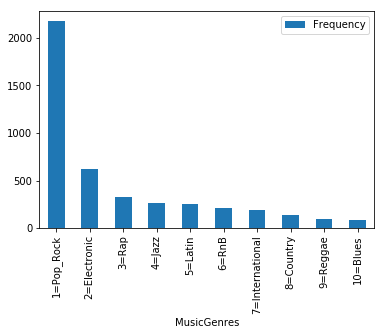

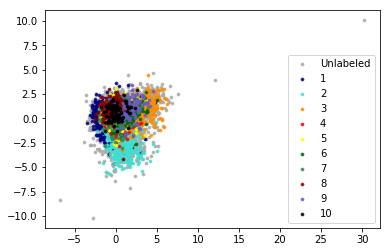

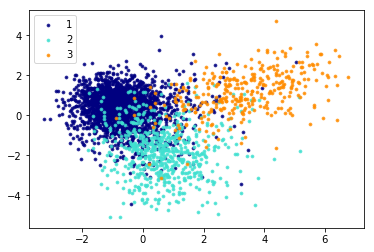

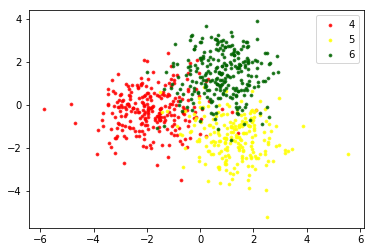

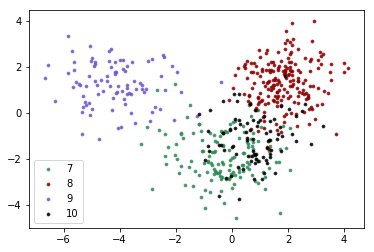

In [4]:


df2=pd.DataFrame(y_train_g)
#class distribution
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "MusicGenres": ['1=Pop_Rock', '2=Electronic', '3=Rap', '4=Jazz', '5=Latin', '6=RnB', '7=International', '8=Country', '9=Reggae', '10=Blues'],
    "Frequency": df2[0].value_counts()
})
df.set_index("MusicGenres",drop=True,inplace=True)
df
df.plot(kind='bar')





scatter2dim([1,2,3,4,5,6,7,8,9,10], lda=True, add_test_data=True)
scatter2dim([1,2,3], lda=True)
scatter2dim([4,5,6], lda=True)
scatter2dim([7,8,9,10], lda=True)



### 2.2. Preprocessing the data


The training data having a bad quality may seriously hamper the accuracy of the classifier that the training yields. Two types of problems with the data may be identified: bad data points called outliers, and bad features.

#### 2.2.1. Finding outliers and Missing values

Outliers refer to data points that dramatically differ from the majority of the training data. If we assume that the training data is generated by some probability distribution, the outliers would be points that seem to be generated by a completely different distribution than most of the data. These kind of points may be in the training data for example due to an error in producing and preprocessing the data. 

Commonly, data points identified as outliers are simply removed from the data. A rationale for this is that the outliers have a relatively large impact on the resulting classifier, but it is unlikely that the test data would contain similar data points, so this impact is harmful.

It can be beneficial to also identify outliers in the test data. This is because there may be no reason the expect that classifiers trained on "usual" data points are applicable on extraordinary points that seem to come from another distribution. In this case, we can identify that the predictions for these points are highly untrustworthy. Moreover, outliers in test data needed to be removed for the clustering approach that uses the test data for training in an unsupervised manner.

In this project  multiple methods of outlier removal were considered. The simplest was to simply identify an outlier from that its euclidean distance to a mean is large. For labeled training data, the mean was the class mean, whereas for unlabeled test data the mean for all points was used. Also, I tried a method called Local Outlier Factor (LOF) (Scikit, *Novelty and Outlier Detection*). A very rough descrpiption of it is that it compares the distances of a point *p* to its neighbors to the distances from the neighbors to their respective neighbors, and identifies *p* as an outlier if the former distances are considerably larger than the latter.

A problem with these methods is the high dimensionality of the data. In high-dimensional space, the variance in distances between points tends to be very small, so it is hard to distinguish outliers. Additionally, data points that appear to be outliers for the original data may not be outliers anymore after dimensionality reduction, if the point is unusual only with respect to features that are ignored in the reduced data. Thus, I also applied the above techniques to data whose dimension was reduced using linear discriminant analysis (LDA).

This however raises a further concern: If outliers are only removed after dimensionality reduction, do they affect the dimensionality reduction process itself? We know that LDA tries to minimize in-class variance, so an outlier might cause the LDA to choose a projection where the outlier is near the class mean, but which is overall worse than the respective projection without the outlier. For this reason, I tested one further method for outlier detection, where I identified an outlier based on how much removing a point before projection reduces the in-class variance of the projected data.

I played around with all of these alternatives. In particular, the I have included code for distinguishing outliers in LDA-projected training data by euclidean distance and decrease in in-class variance in the classes *Outlier_remover_lda_distance* and *Outlier_remover_lda_inclass_variance*, respectively. These classes are inteded to be used with the Python command line interpreter. For outlier removal from test data I used the function *outliers_for_unlabeled*, which uses LOF on data whose dimension was reduced using LDA trained on the labeled training data. LOF scores for the data points are presented in figure as output of the last code cell of this section.

Different choices of training data outliers were tested by training an LDA classifier on the pruned training data. Every choice of outliers tried caused a decrease in validation accuracy, so I concluded that the training data does not contain outliers that should be removed for the clustering approach. For outliers in test data, I similarly considered the impact that removing then causes on the performance of clustering. Here, I noticed significant improvement when removing the data points with indices 6631, 7307, 9366, 9580, 9755, 10142, 10509 and 10556.

The first scatter plot figure in the previous section presents visually how unlabeled data (the gray data points) contain much worse outliers than the labeled data (colourful points). However, this visual analysis is somewhat untrustworthy as the projection is made using LDA, which specifically tries to minimized in-class variance whereas it does not care about the unlabeled data.



#### 2.2.2. Analyzing features

For identifying bad features, the first method  was simply looking at the data. We observed that the features indexed 216-220 (inclusive) had each an identical value for all data points. Thus it was completely clear that they should removed in all cases as they provide no information and are thus useless. Moreover, they are harmful, since they make the data matrix and feature covariance matrix singular, causing computational difficulties for ML methods relying on e.g. matrix inversion. Such problems were observed with clustering techniques

Additionally, I identified a number of features which had the same value for most data points. Even these features may cause singularity issues when only handling a subset of data, and making an unluckly choice of data points such that all points have the same value for the feature. Subsets for data points are considered e.g. with cross validation. Even when handling all the data at the same time, the condition number, strongly related to computational feasibility, probably increases significantly due to these features. A listing of them can be found in the function *features_to_take* below.

The second of the methods to remove undesirable features is linear discriminant analysis which I used for dimensionality reduction for the clustering approach. It is described it in section 3.1.3. Finally, it was checked that there are no null values in the data.








###  Normalized and cleaned data set

In [5]:

# Class for finding outliers
# error metric is distance from class centre in the original space or the 9 dim space, depending on if true/false is passed as parameter "transform" to the compute_scores_labelled method (default True)
class Outlier_remover_lda_distance:
    
    # classes as a python list
    def __init__(self, n_components=None, classes=None):
        self.n_components=n_components

        # these shrink when points are removed
        self.scores_labeled = None
        self.raw_scores = None

        self.classes = classes
        if classes is None:
            self.classes = list(range(10))

        # these stay the same when points removed, removals recorded in the index lists
        self.X_all, self.y_train, self.N_train = X_all_g, y_train_g, N_train_g #load_and_scale_data()
        self.X_train = self.X_all[:self.N_train]

        # removals recorded here
        self.removed_indices = []
        self.remaining_indices = list(range(self.N_train))

        if classes:
            self.remaining_indices = [i for i in np.arange(self.N_train) if self.y_train[i] in self.classes]
            
        
    def compute_scores_labeled(self, transform=True):

        lda = LinearDiscriminantAnalysis(n_components=self.n_components)
        lda.fit(self.X_train[self.remaining_indices], self.y_train[self.remaining_indices])

        X = self.X_train[self.remaining_indices]
        y = self.y_train[self.remaining_indices]
        means = lda.means_
        if transform:
            X = lda.transform(self.X_train[self.remaining_indices])
            means = lda.transform(lda.means_)

        means_per_class_label = np.zeros((11,means.shape[1]))
        for i, class_label in enumerate(self.classes):
            means_per_class_label[class_label] = means[i]

        self.scores_labeled = np.array([np.linalg.norm(X[i]-means_per_class_label[y[i]] , ord=2)**2 for i in np.arange(X.shape[0])])

    def delete_worst_point(self, class_label=None):
        worst_score = np.max(self.scores_labeled)
        worst_index_curr = np.argmax(self.scores_labeled)
        worst_index = self.remaining_indices[worst_index_curr]
        if class_label:
            y_curr = self.y_train[self.remaining_indices]
            class_indices_curr = np.where(y_curr == class_label)[0]
            # print(class_indices_curr.shape, class_indices_curr)
            class_scores = self.scores_labeled[class_indices_curr]
            # curr_for_class_index = self.remaining_indices[class__indices]

            worst_score = np.max(class_scores)
            worst_index_class = np.argmax(class_scores)
            # print(worst_index_class)
            worst_index_curr = class_indices_curr[worst_index_class]
            worst_index = self.remaining_indices[worst_index_curr]

            
        print("Worst score", worst_score, "with index", worst_index)
        self.removed_indices.append(worst_index)
        self.remaining_indices.remove(worst_index)
        self.scores_labeled = np.delete(self.scores_labeled, worst_index_curr, axis=0)

    def delete_worst_points(self, amount, class_label=None):
        for i in range(amount):
            self.delete_worst_point(class_label=class_label)

    def print_worst_scores_with_classes(self, amount, class_label=None):
        worst_indices_curr = np.argsort(self.scores_labeled)[::-1]
        worst_indices = np.array(self.remaining_indices)[worst_indices_curr]
        worst_classes = self.y_train[self.remaining_indices][worst_indices_curr]
        worst_scores = self.scores_labeled[worst_indices_curr]

        combined = np.stack((worst_indices, worst_classes, worst_scores),axis=1)
        np.set_printoptions(formatter={'float': lambda x: "{0:0.6g}".format(x)})
        if class_label:
            combined = np.stack([row for row in combined if row[1]==class_label], axis=1).T
        number = np.arange(1,combined.shape[0]+1).reshape((combined.shape[0],1))
        combined = np.concatenate((number, combined), axis=1)
        print(combined[:amount])
        
        

    # def save_scores_labeled(self, filename):
    #     with open(filename, "w") as f:
    #         json.dump(self.scores_labeled.tolist(), f)

    # def load_scores_labeled(self, filename):
    #     with open(filename, "r") as f:
    #         self.scores_labeled = json.load(f)

    def weights_for_test_plotting(self):
        assert not self.scores_labeled is None, "Calculate scores before plotting!"
        return np.array([max(0,score) for score in self.scores_labeled])

    def plot_2d_test(self):
        marker_size = 3
        lda = LinearDiscriminantAnalysis(solver="eigen", n_components=2)
        X = self.X_train[self.remaining_indices]
        y = self.y_train[self.remaining_indices]
        lda.fit(X, y)
        target_names = np.array(["Unlabeled", "1", "2", "3", "4" ,"5", "6", "7" ,"8", "9", "10"])[self.classes]

        X = lda.transform(X)

        # print(lda.covariance_)

        plt.figure()
        colors = np.array(['navy', 'darkorange', "red", "yellow", "darkgreen", "seagreen", "darkred", "slateblue", "black", "turquoise", "darkgray"])[:len(self.classes)]
        lw = 2 

        weights = self.weights_for_test_plotting()

        min_weight = np.min(weights)
        max_weight = np.max(weights)
        radius = (weights-min_weight) / (max_weight-min_weight)
        
        for color, i, target_name in zip(colors, self.classes, target_names):
            plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                        label=target_name, s=marker_size)

            plt.scatter(X[y == i, 0], X[y == i, 1], s=1000*radius[y == i], 
                        edgecolors=color, facecolors='none', label='Outlier scores')
        plt.legend(loc='best', shadow=False, scatterpoints=1)
        plt.show(block=False)


# found using the above class
# outlier_indices_clustering = [1842, 4308, 2833, 239, 2762, 2865] 

# example usage
deleter1 = Outlier_remover_lda_distance()
deleter1.compute_scores_labeled()
deleter1.print_worst_scores_with_classes(amount=10)
print()
deleter1.print_worst_scores_with_classes(amount=10, class_label=9)
deleter1.delete_worst_points(3, class_label=None)
deleter1.compute_scores_labeled()
print()
deleter1.print_worst_scores_with_classes(amount=10)
print()
print(deleter1.removed_indices)


[[1 2895 7 223.548]
 [2 2865 2 108.471]
 [3 2762 10 104.327]
 [4 3270 7 86.0469]
 [5 4244 4 81.4746]
 [6 3611 3 79.7997]
 [7 2414 6 76.0647]
 [8 3048 6 75.4937]
 [9 2658 4 75.1961]
 [10 3898 3 74.7856]]

[[1 4056 9 64.7535]
 [2 3975 9 60.8701]
 [3 2267 9 60.0587]
 [4 4330 9 57.4488]
 [5 4024 9 48.138]
 [6 3947 9 44.4759]
 [7 2515 9 43.971]
 [8 2739 9 42.0507]
 [9 4291 9 40.0035]
 [10 3085 9 37.335]]
Worst score 223.54758345327807 with index 2895
Worst score 108.47146782774293 with index 2865
Worst score 104.32744376352609 with index 2762

[[1 4244 4 82.0416]
 [2 3611 3 79.5885]
 [3 3270 7 75.4675]
 [4 3898 3 74.7475]
 [5 3048 6 73.9607]
 [6 2414 6 73.7303]
 [7 3496 5 73.6351]
 [8 2777 2 73.5945]
 [9 2635 3 72.3798]
 [10 2338 2 72.2439]]

[2895, 2865, 2762]


/Users/luna/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [6]:
# Class for finding outliers
# A higher outlier score is given to data points whose removal decreases in-class variance more


class Outlier_remover_lda_inclass_variance:
    
    # classes as a python list
    def __init__(self, n_components=9, classes=None):
        self.n_components=n_components

        # these shrink when points are removed
        self.scores_labeled = None
        self.raw_scores = None

        self.classes = classes

        # these stay the same when points removed, removals recorded in the index lists
        self.X_all, self.y_train, self.N_train = X_all_g, y_train_g, N_train_g  #load_and_scale_data()
        self.X_train = self.X_all[:self.N_train]

        # removals recorded here
        self.removed_indices = []
        self.remaining_indices = list(range(self.N_train))

        if classes:
            self.remaining_indices = [i for i in np.arange(self.N_train) if self.y_train[i] in self.classes]


    # not actually an eigenvalue anymore after removal of covar_centroids
    def eigenvalue(self,eigenvector,covar_centroids, covar_in_class):
        num = np.linalg.norm(eigenvector, ord=2)**2 # eigenvector @ eigenvector.T    # eigenvector @ covar_centroids @ eigenvector.T
        den = eigenvector @ covar_in_class @ eigenvector.T
        return num/den

    def eigenvalues(self,lda):
        eigenvectors = lda.scalings_.T[:self.n_components] # by transposing, gets shape n_classes-1,rank
        covar_centroids = np.cov(lda.means_.T) # np.cov wants variables as rows
        covar_in_class = lda.covariance_
        eigenvalues = np.array([self.eigenvalue(eigenvector, covar_centroids, covar_in_class) for eigenvector in eigenvectors])
        return eigenvalues

    def compression_score(self,lda):
        eigenvalues = self.eigenvalues(lda)
        #largest_eigenvalues = np.sort(eigenvalues)[-self.n_components:]
        # print(eigenvalues)
        #print(largest_eigenvalues)
        score = eigenvalues.sum()
        # print("Raw score:", score)
        return score

    def raw_to_scaled_scores(self,raw_scores):
        scaled_scores = []
        for i_curr in range(len(self.remaining_indices)):
            own_score = raw_scores[i_curr]
            y = self.y_train[self.remaining_indices]
            indices = np.array([i for i in np.arange(y.shape[0]) if y[i]==y[i_curr] and not i == i_curr])
            class_scores_others = raw_scores[indices]
            average_others = np.mean(class_scores_others)
            scaled_score = (own_score-average_others)/average_others
            scaled_scores.append(scaled_score)
        return np.array(scaled_scores)
        
    def compute_scores_labeled(self):

        raw_scores = []
        for i_curr in range(len(self.remaining_indices)):
            X_temp = np.delete(self.X_train[self.remaining_indices], i_curr, axis=0)#self.X_train[np.arange(self.N_train) != i_point, :]
            #print(X_temp)
            #print(X_temp.shape)
            y_temp = np.delete(self.y_train[self.remaining_indices], i_curr, axis=0) # self.y_train[np.arange(self.N_train) != i_point]
            #print(y_temp.shape)
            lda = LinearDiscriminantAnalysis(solver="eigen", n_components=self.n_components, store_covariance=True)
            lda.fit(X_temp, y_temp)
            raw_scores.append(self.compression_score(lda))
        
        self.raw_scores = np.array(raw_scores)    

        self.scores_labeled = self.raw_to_scaled_scores(self.raw_scores)
        # print("Scores:")
        # print(self.scores_labeled)
        # return self.scores_labeled

    def delete_worst_point(self, class_label=None):
        worst_score = np.max(self.scores_labeled)
        worst_index_curr = np.argmax(self.scores_labeled)
        worst_index = self.remaining_indices[worst_index_curr]
        if class_label:
            y_curr = self.y_train[self.remaining_indices]
            class_indices_curr = np.where(y_curr == class_label)[0]
            # print(class_indices_curr.shape, class_indices_curr)
            class_scores = self.scores_labeled[class_indices_curr]
            # curr_for_class_index = self.remaining_indices[class__indices]

            worst_score = np.max(class_scores)
            worst_index_class = np.argmax(class_scores)
            # print(worst_index_class)
            worst_index_curr = class_indices_curr[worst_index_class]
            worst_index = self.remaining_indices[worst_index_curr]

            
        print("Worst score", worst_score, "with index", worst_index)
        self.removed_indices.append(worst_index)
        self.remaining_indices.remove(worst_index)
        self.scores_labeled = np.delete(self.scores_labeled, worst_index_curr, axis=0)

    def delete_worst_points(self, amount, class_label=None):
        for i in range(amount):
            self.delete_worst_point(class_label=class_label)

    def print_worst_scores_with_classes(self, amount, class_label=None):
        worst_indices_curr = np.argsort(self.scores_labeled)[::-1]
        worst_classes = self.y_train[self.remaining_indices][worst_indices_curr]
        worst_scores = self.scores_labeled[worst_indices_curr]

        combined = np.stack((worst_classes, worst_scores),axis=1)
        np.set_printoptions(formatter={'float': lambda x: "{0:0.6g}".format(x)})
        if class_label:
            combined = np.stack([row for row in combined if row[0]==class_label], axis=1).T
        number = np.arange(1,combined.shape[0]+1).reshape((combined.shape[0],1))
        combined = np.concatenate((number, combined), axis=1)
        print(combined[:amount])
        
        
    def weights_for_test_plotting(self):
        assert not self.scores_labeled is None, "Calculate scores before plotting!"
        return np.array([max(0,score) for score in self.scores_labeled])

    def plot_2d_test(self):
        marker_size = 3
        lda = LinearDiscriminantAnalysis(solver="eigen", n_components=2)
        X = self.X_train[self.remaining_indices]
        y = self.y_train[self.remaining_indices]
        lda.fit(X, y)
        target_names = np.array(["Unlabeled", "1", "2", "3", "4" ,"5", "6", "7" ,"8", "9", "10"])[self.classes]

        X = lda.transform(X)

        # print(lda.covariance_)

        plt.figure()
        colors = np.array(['navy', 'darkorange', "red", "yellow", "darkgreen", "seagreen", "darkred", "slateblue", "black", "turquoise", "darkgray"])[:len(self.classes)]
        lw = 2 

        weights = self.weights_for_test_plotting()

        min_weight = np.min(weights)
        max_weight = np.max(weights)
        radius = (weights-min_weight) / (max_weight-min_weight)
        
        for color, i, target_name in zip(colors, self.classes, target_names):
            plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw,
                        label=target_name, s=marker_size)

            plt.scatter(X[y == i, 0], X[y == i, 1], s=1000*radius[y == i], 
                        edgecolors=color, facecolors='none', label='Outlier scores')
        plt.legend(loc='best', shadow=False, scatterpoints=1)
        plt.show(block=False)



    
# found using the above class
# outlier_indices_clustering_too_many = [2393, 3880, 3581, 4291, 3181, 4039, 3332, 59, 2921, 2469, 1763, 1086, 1230, 749, 284, 1543, 1404, 1393, 2049, 187, 1136, 978, 500, 2253, 2581, 4308, 3411, 4327, 3382, 3097, 3647, 3291, 2434, 3202, 3576, 4066, 2197, 3708, 3665, 3799, 3461, 2460, 4145, 3004, 2436, 3322, 4149, 3286, 4144, 3753, 3506, 2895, 2352, 2620, 3091, 2810, 3155, 3421]

# outlier_indices_clustering = [59, 1763, 3880, 3202, 2921, 4149, 2393, 3581, 4291]


# example usage
deleter2 = Outlier_remover_lda_distance()
deleter2.compute_scores_labeled()
deleter2.print_worst_scores_with_classes(amount=10)
print()
deleter2.print_worst_scores_with_classes(amount=10, class_label=9)
print()
deleter2.delete_worst_points(3, class_label=None)
deleter2.compute_scores_labeled()
print()
deleter2.print_worst_scores_with_classes(amount=10)
print()
print(deleter2.removed_indices)







[[1 2895 7 223.548]
 [2 2865 2 108.471]
 [3 2762 10 104.327]
 [4 3270 7 86.0469]
 [5 4244 4 81.4746]
 [6 3611 3 79.7997]
 [7 2414 6 76.0647]
 [8 3048 6 75.4937]
 [9 2658 4 75.1961]
 [10 3898 3 74.7856]]

[[1 4056 9 64.7535]
 [2 3975 9 60.8701]
 [3 2267 9 60.0587]
 [4 4330 9 57.4488]
 [5 4024 9 48.138]
 [6 3947 9 44.4759]
 [7 2515 9 43.971]
 [8 2739 9 42.0507]
 [9 4291 9 40.0035]
 [10 3085 9 37.335]]

Worst score 223.54758345327807 with index 2895
Worst score 108.47146782774293 with index 2865
Worst score 104.32744376352609 with index 2762

[[1 4244 4 82.0416]
 [2 3611 3 79.5885]
 [3 3270 7 75.4675]
 [4 3898 3 74.7475]
 [5 3048 6 73.9607]
 [6 2414 6 73.7303]
 [7 3496 5 73.6351]
 [8 2777 2 73.5945]
 [9 2635 3 72.3798]
 [10 2338 2 72.2439]]

[2895, 2865, 2762]


/Users/luna/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


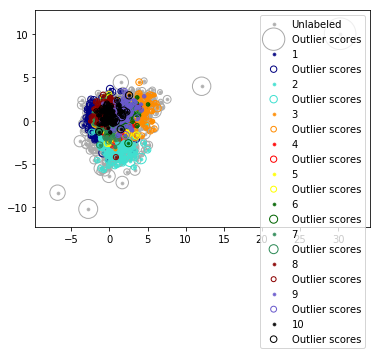

[[9580 12.7277 0]
 [6631 5.17375 0]
 [9366 4.93349 0]
 [9755 3.73108 0]
 [10509 3.71295 0]
 [10142 3.54545 0]
 [10556 2.95422 0]
 [9293 2.92041 0]
 [7307 2.90158 0]
 [2895 2.81961 7]
 [8672 2.78865 0]
 [10902 2.77646 0]
 [6573 2.6709 0]
 [10085 2.58389 0]
 [2414 2.45226 6]
 [5802 2.42343 0]
 [8420 2.40445 0]
 [9915 2.37846 0]
 [6084 2.36188 0]
 [3270 2.36055 7]
 [8750 2.27694 0]
 [10063 2.2461 0]
 [3411 2.23035 2]
 [2865 2.21862 2]
 [10632 2.21641 0]
 [4292 2.2054 7]
 [10660 2.18738 0]
 [10879 2.1656 0]
 [9269 2.16252 0]
 [4788 2.14873 0]
 [9109 2.13363 0]
 [8324 2.12847 0]
 [4979 2.12803 0]
 [6578 2.12019 0]
 [10176 2.10677 0]
 [8702 2.07771 0]
 [7268 2.06597 0]
 [10456 2.04385 0]
 [4668 2.03334 0]
 [9582 2.02671 0]
 [8287 2.02303 0]
 [9657 2.01983 0]
 [10841 2.00116 0]
 [6363 1.99675 0]
 [10608 1.99373 0]
 [10465 1.99254 0]
 [9759 1.99084 0]
 [7079 1.99005 0]
 [10464 1.98014 0]
 [7560 1.96766 0]
 [6023 1.9651 0]
 [2777 1.95592 2]
 [10569 1.95447 0]
 [6856 1.95413 0]
 [4618 1.94612 0]

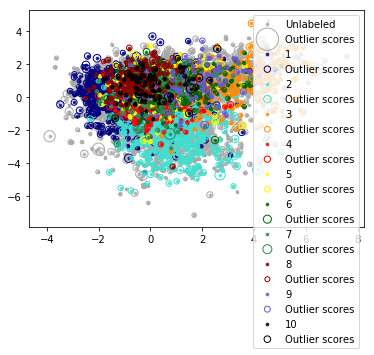

In [7]:
def outliers_for_unlabeled():
    # load data
    X_all, y_train, N_train = X_all_g, y_train_g, N_train_g # load_and_scale_data()
    X_train = X_all[:N_train]
    y_all = np.concatenate((y_train, np.zeros(X_all.shape[0]-N_train)))


    # train dim reducer on train data, transform all data
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    X_all = lda.transform(X_all)
    X_train = X_all[:N_train]


    lof = LocalOutlierFactor(n_neighbors=20)
    lof.fit(X_all)
    scores = -lof.negative_outlier_factor_

    scatter2dim([1,2,3,4,5,6,7,8,9,10], lda=True, add_test_data=True, weights=scores, remove_test_outliers=False)


    worst_indices = np.argsort(scores)[::-1]
    worst_scores = scores[worst_indices]
    worst_classes = y_all[worst_indices]

    combined = np.stack((worst_indices, worst_scores, worst_classes),axis=1)
    np.set_printoptions(formatter={'float': lambda x: "{0:0.6g}".format(x)})
    print(combined[:100])
    
    return scores


scores = outliers_for_unlabeled()

# after outliers removed:

scatter2dim([1,2,3,4,5,6,7,8,9,10], lda=True, add_test_data=True, weights=scores, remove_test_outliers=True)

## 3. Methods and experiments

#### 3.1. Overview of the Deep learning and ML methods used
A selection of six machine learning classifiers are studied: logistic regression,linear discriminant analysis, clustering and a combined approach were naive bayesian classifier and clustering are combined, these methods then are then compared to two deep learning techniques: multi layer perceptron and convolutional network.  These methods are applied fot the purpose of multi-class classification and  are considered for both original and upsampled data. In training phase, training data is further split using K-fold cross-validation (Geron, 2017) method (in this case K=5 is used) to get performance metrics on the behaviour of the classifier.
After getting overall results from the performance of the classifiers (and hyperparameter search for one of them), their results are compared. When evaluating their relative merits  the log-loss metric are considered in addition to accuracy. 


#### 3.1.1. Logistic regression

Logistic regression is a supervised machine learning method for training binary classifiers [jung_machine]. The predictor $h$ is based on a linear map $h(x) = \mathbf{w}^T\mathbf{x}$, for which the training process finds the optimal weight vector $\mathbf{w}$. The predicted label $\hat{y}_i \in \{-1, 1 \}$ is decide by the rule $\hat{y}_i = 1$ if $h(\mathbf{x}) \geq 0$ and $\hat{y}_i = -1$ if $h(x) < 0$. Loss is measured by the function $\epsilon(w \mid X) = (1/N) \sum_{i=1}^{N} \log(1+ \exp(-y_i \mathbf{w}^T \mathbf{x}))$. The optimal weight vector can be found using e.g. gradient descent.

Multiclass classification can be achieved e.g. by the one-vs-all method. There for every class a binary classifier is trained that distinguishes between points of that class and all the other classes. The final label is obtained by comparing the values of $h(x)=\mathbf{w}^T \mathbf{x}$ from the different binary classifiers, and choosing the label that correspond to the highest value (i.e. for each binary classifierlabel 1 corresponds to the class that is being distinguished and -1 to all the others).

#### 3.1.2. Gaussian Mixture Model Fuzzy Clustering

In this work I use as an unsupervised method fuzzy clustering based on Gaussian Mixture Models (GMMs) [jung_machine]. Roughly speaking, gaussian mixtures are probability distributions that consist of preset number of individual gaussian distributions with different parameters, where each individual distribution is equated to a cluster. The goal of the method is to learn the Gaussian Mixture that best explains the data. This is done via an iteration process which alternates between updating the distribution parameters and the probabilities for each data point to belong to each cluster/gaussian. The iteration finds a local optimum that is not guaranteed to be globally optimal.

#### 3.1.3. Linear discriminant analysis

Linear discriminant analysis (LDA) is a supervised learning method for training a classifier and for dimensionality reduction, both purposes of which I also make use of (Scikit, *Linear and Quadratic Discriminant Analysis*). Like GMM fuzzy clustering, LDA is also based on finding gaussian distributions which best explain the data. A key difference to GMM clustering is that the class labels are known beforehand, which allows us to estimate the parameters of the gaussians via closed-from formulas. Also in LDA, the covariance matrices are the same for the gaussians for each class. (Allowing an unique covariance for each class leads to a somewhat more general method, quadratic discriminant analysis.)

Unlabeled data points are then classified according to which gaussian is most likely to have been produced the data point. This leads to linear decision surfaces.

A method for dimensionality reduction is obtained as follows: First, since the covariances are equal for all the gaussians, I can perform a linear change of coordinates such that the covariance matrix becomes an identity matrix in the resulting space. Due to the covariance being the idenity, I can classify points based on euclidean distance from the class centres. This however can be performed equally well if I project the data onto a hyperplane that is spanned by the class centres. These linear mappings together yield the linear transformation for reducing dimensionality of the data. This derivation also explains the fact that the maximum number of dimensions after projection for LDA is the number of classes minus one.

An alternative view of LDA (and a side-effect of the above) is that it maximizes the ratio between variance of the class centres to in-class variance, thus finding a linear projection that separates the classes as well as possible from one another. An exposition from this viewpoint is given in (Tharwat et al., 2017).

#### 3.1.4. Neural Network: A multilayer Perceptron and Convolutional Neural Network: 


Neural networks have the ability to model data with high volatility and volume and with complex relations. 
Deep multilayer network is chosen as a model, because they have shown to yield good out-of-the-box classification accuracies for many scenarioes (Mintes et al., 2018). They have also been used successfully in music classification tasks (Mints etal., 2018). They make for a general purpose classifier, because they don't require a lot of pre-processing for the data. This is possible, because they are built to classify the data according to the most features they consider the most important. This also implies that they are not very sensible to outliers in the data, because outliers generally are not very important for the whole dataset. Since the music dataset for this project has some outliers, this was considered a useful property.

For this purpose I tried different architecture of multilayer perceptron is suitable for classification prediction problems and particularly when I are dealing with large datasets. For multilayer perceptron I imported Keras package from Theano neural network library, where I used sequential model configured with varying number of hidden layers, drop out rates and nodes. Here the models is as:
Neural network configuration: epoches=50, batch_size=394, tanh activation function, and 3 hidden layers, training time of 30 seconds. The hyperparameters of the model were optimized  by doing cross validation with different values for the hyperparameters on the training data set. The hyperparameters were chosen such that they yielded the best average scrore for all cross validation folds.

Furtheremore, a 1D convolution layer creates a convolution kernel that passes over a single spatial (or temporal) dimension to produce a tensor of outputs (see documentation). This process can be applied to one-dimensional sequences of data. The model extracts features from sequences data and maps the internal features of the sequence. A 1D CNN is very effective for deriving features from a segmenst of the overall dataset, where it is not so important where the feature is located in the segment. Analysis of signal data over a fixed-length period, for example, an audio recording can be conducted applying convolutional network. 

For the purpose of this project there was one main reason why convolutional network was also applied. It is not mentioned in the documentation of the data whether there is sequential in the data structure(Choi, 2017). It was not evident wether the data is structured in sequence and order. Therefore I thought to try out convolutional network and compare the results, since audio data could possibly have sequential order(Lee, 2009).
The architecture of the network is:
1d convolutional layer with kernel size 3 (no padding) followed by reLU, 
1d convolutional layer with kernel size 3 (no padding) followed by reLU, 
Max-pooling layer with kernel size 2 and stride 2, 
A fully-connected layer with 100  outputs, 
followed by relu, 
A fully-connected layer, 
follower by softmax
The 1D layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.


### 3.2. Combined approach

The intention was to combine the unsupervised and supervised methods reviewed above to obtain an semi-supervised learning method which I hypothesized would yield the best results. After preprocessing both the training and testing data, as detailed in section *WHAT*, I use unsupervised fuzzy clustering based on GMMs. The goal is to obtain clusterings, where the clusters correspond well to classes/genres. The obtained output is a probability matrix *P(i_point, i_class)*, where there is a cell for each data point - class pair telling the probability that the data point belongs to the class. 

The plan was to then feed these probabilities as input for the two supervised ML methods, logistic regression and neural networks. One possiblity is to consider the probabilities for data point *p* for belonging to the classes as additional features of point *p*, and then proceed with usual supervised classification using either the one-vs-all or one-vs-one method. Another possibility would be to decide to classify points only to the *n* classes that are most likely correct based on clustering, which would entail training supervised classifiers for all combinations of *n* classes. I intended to only try *n=2*, in which case I would only need to train classifiers that distinguish between two classes.

This method of combining unsupervised fuzzy clustering to supervised learning is from the article (Poria et al., 2013). The main differences between the approaches and that of the article are that the article uses fuzzy c-means clustering as the clustering method instead of GMM, and uses SVMs for the supervised learning. It tried other methods as well, but those were the ones they obtained the best results with. They managed to obtain an excellent prediction accuracy of 97.10%.

However, I did not manage to replicate those results. The main obstacle encountered was that I was not able to find good clusterings via GMMs. Thus, I did not see the incentive to try a combined approach, so I settled with trying the methods separately.





In [8]:

# different small utility functions

# prints a csv file that satisfies the submission format for the accuracy competition
# input: a numpy array of predicted labels
def write_submission_file_accuracy(y_predicted, filename="solution_accuracy.csv"):
    df_predicted_validation_labels = pd.DataFrame(data=y_predicted, columns = ["Sample_label"])
    df_predicted_validation_labels.index.name = "Sample_id"
    df_predicted_validation_labels.index += 1

    #df_predicted_validation_labels.to_csv(filename)

# prints a csv file that satisfies the submission format for the logloss competition
# input: a numpy array of predicted labels
def write_submission_file_logloss(likelihood_matrix, filename="solution_logloss.csv"):
    column_names = ["Class_"+str(label) for label in range(1,11)]
    df_likelihood_matrix = pd.DataFrame(data=likelihood_matrix, columns = column_names)
    df_likelihood_matrix.index.name = "Sample_id"
    df_likelihood_matrix.index += 1

    #df_likelihood_matrix.to_csv(filename)

# transforms a shape (Nx10) likelihood matrix into a shape (N,) vector of predictions
def likelihoods_to_predicted_labels(likelihood_matrix):
    return np.array([np.argmax(likelihoods_per_point)+1 for likelihoods_per_point in likelihood_matrix])

# returns the percentage of failed predictions
# y_pred and y_real should have shape (N_samples, 1)
# weights means weighting according to class frequencies
def loss_accuracy(y_pred, y_real, weighted=False):
    weights = np.ones((y_real.shape[0],))
    if weighted:
        class_to_frequency = class_weights(y_real)
        weights = np.array([1/class_to_frequency[y-1] for y in y_real])
    accuracy = np.average(np.array([1 if a == b else 0 for (a,b) in zip(y_pred,y_real)]), weights=weights)
    loss = 1-accuracy
    return loss

# note that y_pred has shape (N_samples,N_labels) while y_real has shape (N_samples,1)
# weights means weighting according to class frequencies
def loss_logloss(y_pred, y_real, weighted=False):
    weights = None
    if weighted:
        class_to_frequency = class_weights(y_real)
        weights = np.array([1/class_to_frequency[y-1] for y in y_real])
    loss = sklearn.metrics.log_loss(y_real, y_pred, sample_weight=weights, labels=[1,2,3,4,5,6,7,8,9,10])
    return loss

# array which tells for every class how many times it occurs in the training labels
# note that class labels start from 1 while class indices start from 0!
def class_weights(y):
    unique, counts = np.unique(y, return_counts=True)
    n_classes = 10
    class_weights = np.zeros(n_classes)
    for classNumber, count in zip(unique, counts):
            class_weights[classNumber-1] = count
    return class_weights

# finalizes probability matrix for submission to the logloss competition
# adds clipping and makees it so that outliers get an equal probability for every genre
def finalize_logloss_output(probabilities, clip=0.01):
    as_list = probabilities.tolist()

    def outliers(i_point, row):
        outliers_in_test_data = [9580, 6631, 9366, 9755, 10509, 10142, 10556, 7307]
        if i_point in outliers_in_test_data:
            return [1/len(row)]*len(row)
        return row
        
    def mapping(elem):
        ret = min(elem, 1-clip)
        ret = max(ret, clip)
        return ret

    outliers_handled = [ outliers(i_point, row) for i_point, row in enumerate(as_list)]
    
    ret = [ [mapping(element) for element in row] for row in outliers_handled]

    return np.array(ret)


In [9]:
# path1="../data/train_data.csv"
# path2="../data/train_labels.csv"

# df_train_data=pd.read_csv(path1,delimiter =None, header=None, index_col=False)
# df_train_labels=pd.read_csv(path2,delimiter =None, header=None, index_col=False)

 
# X_train = X_train_g # np.array(df_train_data.values)
# y_trainn = y_train_g # np.array(df_train_labels.values).ravel()
# print(y_trainn)

def get_nn_clf(X_train, y_trainn):
         
    # in order to fix the dimension                 
    def get_labels(X):
        N=X.shape[0]
        y = np.zeros((N,1))
        for i in range (N):
            y[i]=X[i]
        #raise NotImplementedError()
        return y       




    y_train1=get_labels(y_trainn)
    # print(y_train1)
    # print(np.array(df_train_labels.values))

    from keras.utils import to_categorical
    #y_binary
    y_train = to_categorical(y_train1)[:,1:]

    #Split to test and training with 0.20 ratio
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=0 )


   

    #Part2 : weighted sum - activation function
    #Part3 : Decide to pass a signal or not to pass a signal
    import keras
    from keras.models import Sequential
    from keras.layers import Dense

    #Initialising the ANN
    classifier4 = Sequential()

    #Adding the input layer and the first hidden layers
    classifier4.add(Dense(output_dim=32, init='uniform', activation ='relu', input_dim=260))

    #Adding the 2nd hidden layer
    classifier4.add(Dense(output_dim=11, init='uniform', activation ='relu' ))

    #Add the output layer
    classifier4.add(Dense(output_dim=10, init='uniform', activation ='sigmoid' ))

    #Compiling the ANN
    classifier4.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    #Fitting the ANN to the Training set

    classifier4.fit(X_train, y_train, batch_size=349, nb_epoch=50)

    #Making the predictions and evaluating the model
    # evaluate the model
    scores = classifier4.evaluate(X_train, y_train)
    print("\n%s: %.2f%%" % (classifier4.metrics_names[1], scores[1]*100))

    #Predicting the test set results
    from sklearn.metrics import accuracy_score

    y_pred=classifier4.predict(X_test)
    predicted = np.argmax(y_pred, axis=1)



    #predicted= to_categorical(predicted)

    y_pred2=(y_pred>0.5)
    
    return classifier4


# train nn on all train data
nn_clf = get_nn_clf(X_train_g, y_train_g)

# cross validate
from keras.utils import to_categorical
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
test_scores = []
for i_train, i_test in skf.split(X_train_g, y_train_g):
    clf = get_nn_clf(X_train_g[i_train], y_train_g[i_train])
    print(X_train_g[i_test].shape, y_train_g[i_test].shape)
    y_train = to_categorical(y_train_g)[:,1:]
    test_scores.append(clf.evaluate(X_train_g[i_test], y_train[i_test])[1])

print("Validation error:", np.average(test_scores))




/Users/luna/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=260, units=32, kernel_initializer="uniform")`
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10, kernel_initializer="uniform")`
/Users/luna/anaconda3/lib/python3.6/si

Epoch 1/50
3490/3490 [==============================] - 0s 138us/step - loss: 2.2974 - acc: 0.3656
Epoch 2/50
3490/3490 [==============================] - 0s 43us/step - loss: 2.2733 - acc: 0.4585
Epoch 3/50
3490/3490 [==============================] - 0s 46us/step - loss: 2.2056 - acc: 0.4943
Epoch 4/50
3490/3490 [==============================] - 0s 39us/step - loss: 2.0592 - acc: 0.5034
Epoch 5/50
3490/3490 [==============================] - 0s 34us/step - loss: 1.8649 - acc: 0.4989
Epoch 6/50
3490/3490 [==============================] - 0s 32us/step - loss: 1.7324 - acc: 0.4989
Epoch 7/50
3490/3490 [==============================] - 0s 35us/step - loss: 1.6284 - acc: 0.4989
Epoch 8/50
3490/3490 [==============================] - 0s 35us/step - loss: 1.5685 - acc: 0.4989
Epoch 9/50
3490/3490 [==============================] - 0s 37us/step - loss: 1.5370 - acc: 0.4989
Epoch 10/50
3490/3490 [==============================] - 0s 33us/step - loss: 1.5082 - acc: 0.4989
Epoch 11/50
3490/3

2788/2788 [==============================] - 0s 38us/step - loss: 1.1978 - acc: 0.5624
Epoch 33/50
2788/2788 [==============================] - 0s 36us/step - loss: 1.1858 - acc: 0.5699
Epoch 34/50
2788/2788 [==============================] - 0s 32us/step - loss: 1.1749 - acc: 0.5775
Epoch 35/50
2788/2788 [==============================] - 0s 33us/step - loss: 1.1628 - acc: 0.5929
Epoch 36/50
2788/2788 [==============================] - 0s 32us/step - loss: 1.1516 - acc: 0.6015
Epoch 37/50
2788/2788 [==============================] - 0s 34us/step - loss: 1.1401 - acc: 0.6101
Epoch 38/50
2788/2788 [==============================] - 0s 32us/step - loss: 1.1278 - acc: 0.6169
Epoch 39/50
2788/2788 [==============================] - 0s 32us/step - loss: 1.1152 - acc: 0.6216
Epoch 40/50
2788/2788 [==============================] - 0s 32us/step - loss: 1.1021 - acc: 0.6266
Epoch 41/50
2788/2788 [==============================] - 0s 33us/step - loss: 1.0898 - acc: 0.6316
Epoch 42/50
2788/2788 

2792/2792 [==============================] - 0s 41us/step - loss: 1.4990 - acc: 0.5011
Epoch 13/50
2792/2792 [==============================] - 0s 39us/step - loss: 1.4711 - acc: 0.5011
Epoch 14/50
2792/2792 [==============================] - 0s 33us/step - loss: 1.4453 - acc: 0.4996
Epoch 15/50
2792/2792 [==============================] - 0s 34us/step - loss: 1.4225 - acc: 0.5118
Epoch 16/50
2792/2792 [==============================] - 0s 38us/step - loss: 1.4026 - acc: 0.5172
Epoch 17/50
2792/2792 [==============================] - 0s 33us/step - loss: 1.3838 - acc: 0.5226
Epoch 18/50
2792/2792 [==============================] - 0s 33us/step - loss: 1.3646 - acc: 0.5279
Epoch 19/50
2792/2792 [==============================] - 0s 33us/step - loss: 1.3472 - acc: 0.5315
Epoch 20/50
2792/2792 [==============================] - 0s 32us/step - loss: 1.3300 - acc: 0.5315
Epoch 21/50
2792/2792 [==============================] - 0s 33us/step - loss: 1.3133 - acc: 0.5369
Epoch 22/50
2792/2792 

2794/2794 [==============================] - 0s 39us/step - loss: 1.2497 - acc: 0.5737
Epoch 44/50
2794/2794 [==============================] - 0s 38us/step - loss: 1.2417 - acc: 0.5798
Epoch 45/50
2794/2794 [==============================] - 0s 36us/step - loss: 1.2361 - acc: 0.5855
Epoch 46/50
2794/2794 [==============================] - 0s 38us/step - loss: 1.2353 - acc: 0.5877
Epoch 47/50
2794/2794 [==============================] - 0s 38us/step - loss: 1.2331 - acc: 0.5859
Epoch 48/50
2794/2794 [==============================] - 0s 33us/step - loss: 1.2280 - acc: 0.5866
Epoch 49/50
2794/2794 [==============================] - 0s 34us/step - loss: 1.2229 - acc: 0.5884
Epoch 50/50
2794/2794 [==============================] - 0s 87us/step

acc: 59.48%
(870, 260) (870,)
870/870 [==============================] - 0s 37us/step
Epoch 1/50
2795/2795 [==============================] - 1s 201us/step - loss: 2.2995 - acc: 0.4182
Epoch 2/50
2795/2795 [==============================] - 0s 32us

In [10]:
#  compeletion for NN results

y_pred_submission=nn_clf.predict(X_test_g)
predicted_submission = np.argmax(y_pred_submission, axis=1)+1

y_train_categorical = to_categorical(y_train_g)[:,1:]
print("Training error:", nn_clf.evaluate(X_train_g, y_train_categorical)[1])

print(y_pred_submission)
y_pred_finalized = finalize_logloss_output(y_pred_submission)
print(y_pred_finalized)
print(y_pred_finalized.shape)
print(predicted_submission)
print(predicted_submission.shape)

write_submission_file_accuracy(predicted_submission, "nn_results_accuracy.csv")
write_submission_file_logloss(y_pred_finalized, "nn_results_logloss.csv")

4363/4363 [==============================] - 0s 38us/step
Training error: 0.6878294751044672
[[0.00856984 0.00755824 0.0246313 ... 4.64005e-06 0.0060228 0.000245586]
 [0.0164128 0.0105781 0.152921 ... 0.000395885 0.117208 0.00612813]
 [0.565171 0.00092277 0.000173688 ... 0.0987108 0.00015451 0.00606964]
 ...
 [0.311182 0.0203891 0.000617072 ... 0.000666175 0.000188041 0.00104124]
 [0.00435612 0.0284446 0.188791 ... 5.27757e-09 0.000821002 2.27714e-06]
 [0.299242 0.00298995 0.000507552 ... 0.0524264 0.00106797 0.015285]]
[[0.01 0.01 0.0246313 ... 0.01 0.01 0.01]
 [0.0164128 0.0105781 0.152921 ... 0.01 0.117208 0.01]
 [0.565171 0.01 0.01 ... 0.0987108 0.01 0.01]
 ...
 [0.311182 0.0203891 0.01 ... 0.01 0.01 0.01]
 [0.01 0.0284446 0.188791 ... 0.01 0.01 0.01]
 [0.299242 0.01 0.01 ... 0.0524264 0.01 0.015285]]
(6544, 10)
[3 6 1 ... 1 3 1]
(6544,)


In [11]:
#Convolutional network
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

#define the convolutional architecture and compile the model

def get_nn_c1f(X_train, y_trainn):
    # in order to fix the dimension                 
    def get_labels(X):
        N=X.shape[0]
        y = np.zeros((N,1))
        for i in range (N):
            y[i]=X[i]
        #raise NotImplementedError()
        return y       
    y_train1=get_labels(y_trainn)
    # print(y_train1)
    # print(np.array(df_train_labels.values))
    from keras.utils import to_categorical
    #y_binary
    y_train = to_categorical(y_train1)[:,1:]
    #Split to test and training with 0.20 ratio
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=0 )

    
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
    # run an experiment
    
    return model
cn_clf = get_nn_clf(X_train_g, y_train_g)
# cross validate
from keras.utils import to_categorical
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
test_scores = []
for i_train, i_test in skf.split(X_train_g, y_train_g):
    clf = get_nn_clf(X_train_g[i_train], y_train_g[i_train])
    print(X_train_g[i_test].shape, y_train_g[i_test].shape)
    y_train = to_categorical(y_train_g)[:,1:]
    test_scores.append(clf.evaluate(X_train_g[i_test], y_train[i_test])[1])

print("Validation error:", np.average(test_scores))

/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=260, units=32, kernel_initializer="uniform")`
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=11, kernel_initializer="uniform")`
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10, kernel_initializer="uniform")`
/Users/luna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/50
3490/3490 [==============================] - 1s 172us/step - loss: 2.2975 - acc: 0.4014
Epoch 2/50
3490/3490 [==============================] - 0s 27us/step - loss: 2.2724 - acc: 0.5040
Epoch 3/50
3490/3490 [==============================] - 0s 27us/step - loss: 2.1987 - acc: 0.4997
Epoch 4/50
3490/3490 [==============================] - 0s 29us/step - loss: 2.0409 - acc: 0.4989
Epoch 5/50
3490/3490 [==============================] - 0s 33us/step - loss: 1.8257 - acc: 0.4989
Epoch 6/50
3490/3490 [==============================] - 0s 33us/step - loss: 1.6639 - acc: 0.4989
Epoch 7/50
3490/3490 [==============================] - 0s 31us/step - loss: 1.5828 - acc: 0.4989
Epoch 8/50
3490/3490 [==============================] - 0s 28us/step - loss: 1.5267 - acc: 0.4989
Epoch 9/50
3490/3490 [==============================] - 0s 27us/step - loss: 1.4879 - acc: 0.4989
Epoch 10/50
3490/3490 [==============================] - 0s 27us/step - loss: 1.4593 - acc: 0.4989
Epoch 11/50
3490/3

2788/2788 [==============================] - 0s 28us/step - loss: 1.2007 - acc: 0.5940
Epoch 34/50
2788/2788 [==============================] - 0s 28us/step - loss: 1.1869 - acc: 0.6004
Epoch 35/50
2788/2788 [==============================] - 0s 28us/step - loss: 1.1726 - acc: 0.6062
Epoch 36/50
2788/2788 [==============================] - 0s 27us/step - loss: 1.1596 - acc: 0.6087
Epoch 37/50
2788/2788 [==============================] - 0s 27us/step - loss: 1.1473 - acc: 0.6126
Epoch 38/50
2788/2788 [==============================] - 0s 27us/step - loss: 1.1335 - acc: 0.6191
Epoch 39/50
2788/2788 [==============================] - 0s 28us/step - loss: 1.1221 - acc: 0.6266
Epoch 40/50
2788/2788 [==============================] - 0s 27us/step - loss: 1.1099 - acc: 0.6298
Epoch 41/50
2788/2788 [==============================] - 0s 28us/step - loss: 1.0981 - acc: 0.6367
Epoch 42/50
2788/2788 [==============================] - 0s 27us/step - loss: 1.0858 - acc: 0.6388
Epoch 43/50
2788/2788 

2792/2792 [==============================] - 0s 28us/step - loss: 1.4633 - acc: 0.5011
Epoch 14/50
2792/2792 [==============================] - 0s 28us/step - loss: 1.4403 - acc: 0.5011
Epoch 15/50
2792/2792 [==============================] - 0s 29us/step - loss: 1.4212 - acc: 0.5025
Epoch 16/50
2792/2792 [==============================] - 0s 31us/step - loss: 1.4022 - acc: 0.5140
Epoch 17/50
2792/2792 [==============================] - 0s 29us/step - loss: 1.3852 - acc: 0.5261
Epoch 18/50
2792/2792 [==============================] - 0s 28us/step - loss: 1.3687 - acc: 0.5333
Epoch 19/50
2792/2792 [==============================] - 0s 28us/step - loss: 1.3528 - acc: 0.5430
Epoch 20/50
2792/2792 [==============================] - 0s 28us/step - loss: 1.3365 - acc: 0.5598
Epoch 21/50
2792/2792 [==============================] - 0s 28us/step - loss: 1.3203 - acc: 0.5677
Epoch 22/50
2792/2792 [==============================] - 0s 28us/step - loss: 1.3040 - acc: 0.5763
Epoch 23/50
2792/2792 

2794/2794 [==============================] - 0s 28us/step - loss: 1.2954 - acc: 0.5451
Epoch 45/50
2794/2794 [==============================] - 0s 28us/step - loss: 1.2894 - acc: 0.5465
Epoch 46/50
2794/2794 [==============================] - 0s 28us/step - loss: 1.2832 - acc: 0.5469
Epoch 47/50
2794/2794 [==============================] - 0s 29us/step - loss: 1.2779 - acc: 0.5483
Epoch 48/50
2794/2794 [==============================] - 0s 28us/step - loss: 1.2769 - acc: 0.5480
Epoch 49/50
2794/2794 [==============================] - 0s 28us/step - loss: 1.2725 - acc: 0.5480
Epoch 50/50
2794/2794 [==============================] - 0s 105us/step

acc: 54.87%
(870, 260) (870,)
870/870 [==============================] - 0s 37us/step
Epoch 1/50
2795/2795 [==============================] - 1s 277us/step - loss: 2.2987 - acc: 0.3513
Epoch 2/50
2795/2795 [==============================] - 0s 29us/step - loss: 2.2811 - acc: 0.5170
Epoch 3/50
2795/2795 [==============================] - 0s 29us

In [12]:
def naive_lr_classifier(X_train, y_train):
    # Could use option class_weight = "balanced". No sure what it does, worsens results for test(), almost identical result when training with all of the training data
    classifier = LogisticRegression(random_state=0, solver='lbfgs',
                                    multi_class='ovr').fit(X_train, y_train)
    return classifier
   
# test by dividing labeled training data into training and validation data (50%-50%)
def test(seed):
    # train for part of the training data

    np.random.seed(seed)

    X,y = X_train_g, y_train_g 
    N = X.shape[0]

    # shuffledIndices = np.array(range(N))
    # np.random.shuffle(shuffledIndices)

    # splitPosition = round(3*N/4)
    # train_indices = shuffledIndices[:splitPosition]
    # test_indices = shuffledIndices[splitPosition:]
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    test_scores = []
    for i_train, i_test in skf.split(X, y):
        clf = naive_lr_classifier(X[i_train], y[i_train])
        test_scores.append(clf.score(X[i_test], y[i_test]))

    print("Validation error:", np.average(test_scores))


print("Validating with random splits, reserving 1/4 of data for validation:")
test(0)


lr_clf = naive_lr_classifier(X_train_g, y_train_g)

print("Training accuracy for submission classifier:", lr_clf.score(X_train_g, y_train_g))


write_submission_file_accuracy(lr_clf.predict(X_test_g), "lr_results_accuracy.csv")
write_submission_file_logloss(finalize_logloss_output(lr_clf.predict_proba(X_test_g)), "lr_results_logloss.csv")


Validating with random splits, reserving 1/4 of data for validation:
Validation error: 0.6435716816076932
Training accuracy for submission classifier: 0.7607151042860417


In [13]:
def lda_classify_accuracy(filename_prefix="results_lda"):

    X_all, y_train, N_train = X_all_g, y_train_g, N_train_g  # load_and_scale_data()
    X_train = X_all[:N_train]
    X_test = X_all[N_train:]

    # points_to_skip = outlier_indices_clustering
    # points_to_take = np.array([i for i in range(N_train) if not i in points_to_skip]) 

    # X_train = X_train[points_to_take]
    # y_train = y_train[points_to_take]

    

    lda = LinearDiscriminantAnalysis()

    lda.fit(X_train, y_train)

    print("Accuracy with training data:", lda.score(X_train, y_train))

    prob_predicted_train = lda.predict_proba(X_train)
    print("Logloss with training data:", loss_logloss(prob_predicted_train, y_train))

    y_predicted = lda.predict(X_test)
    prob_predicted = lda.predict_proba(X_test)

    write_submission_file_accuracy(y_predicted, filename=filename_prefix+"_accuracy.csv")
    write_submission_file_logloss(finalize_logloss_output(prob_predicted), filename=filename_prefix+"_logloss.csv")
    
    # cross validate
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    test_scores = []
    for i_train, i_test in skf.split(X_train, y_train):
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train[i_train], y_train[i_train])
        test_scores.append(lda.score(X_train[i_test], y_train[i_test]))

    print("Validation error:", np.average(test_scores))
    
lda_classify_accuracy()

Accuracy with training data: 0.7400870960348385
Logloss with training data: 0.8411390130912854
Validation error: 0.646544405771927


/Users/luna/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [14]:

# RUNNING THIS CELL TAKES A FEW MINUTES DUE TO QUITE HEAVY COMPUTATIONS. DON'T PANIC!


# code for searching for good unsupervised GMM clusterings
# intended to be used interactively from the command line interpreter, example use at the end

    

# a wrapper class for sklearn.mixture.GaussianMixture
class Gmm:
    
    def __init__(self, X_all, covariance_type, random_seed=0, file_name=None, n_clusters=10, kmeans=False, weights_init=None, means_init=None, precisions_init=None):
        self.n_clusters = n_clusters
        self.n_classes = 10

        self.X_all = X_all

        self.covariance_type = covariance_type

        self.gmm = None
        if file_name:
            self.load_gmm(file_name)
        else:
            self.train(random_seed, kmeans, weights_init, means_init, precisions_init)

    def get_gmm(self):
        assert (self.gmm), "No GMM found!"
        return self.gmm


    def train(self, random_seed=0, kmeans=False, weights_init=None, means_init=None, precisions_init=None):

        initialGuess = "kmeans" if kmeans else "random"
        self.gmm = GaussianMixture(n_components=self.n_clusters, 
                                   covariance_type=self.covariance_type, 
                                   tol=0.001,
                                   max_iter=1000,
                                   n_init=1, 
                                   init_params=initialGuess,
                                   weights_init=weights_init,
                                   means_init=means_init,
                                   precisions_init=precisions_init,
                                   random_state=random_seed,
                                   verbose=0)
        self.gmm.fit(self.X_all)

    def save_gmm(self, file_name):
        with open(file_name, "wb") as output_file:
            pickle.dump(self.gmm, output_file)

    def load_gmm(self, file_name):
        with open(file_name, "rb") as input_file:
            self.gmm = pickle.load(input_file)
        assert (self.gmm.get_params()["n_components"]==self.n_clusters), "Number of clusters differs between parameter of this class and loaded model"

    def get_class_confidence_per_cluster(self, X_train, y_train, unscaled=False):
        # want to give each class an equal amount of votes, so count class weights for that
        class_weights_array = class_weights(y_train)

        # determine class for each cluster by voting, data points split their 1/class_weight vote among classes according to their probabilities of belonging
        belongings_train = self.likelihood_matrix(X_train)
        votes_per_cluster = belongings_train.T
        # print("Votes per cluster:", votes_per_cluster.shape, votes_per_cluster)
        class_confidence_per_cluster = np.zeros((self.n_clusters, self.n_classes))
        # print("class_confidence_per_cluster:", class_confidence_per_cluster.shape, class_confidence_per_cluster)
        for i_cluster, votes in enumerate(votes_per_cluster):
            for i_data_point, value in enumerate(votes):
                i_class = y_train[i_data_point]-1
                class_confidence_per_cluster[i_cluster][i_class] += value/class_weights_array[i_class]

        # print("class confidence before scaling:", class_confidence_per_cluster)

        if unscaled:
            return class_confidence_per_cluster

        # scale so that values sum to 1, representing probabilities
        for iCluster, cluster in enumerate(class_confidence_per_cluster):
            class_confidence_per_cluster[iCluster] /= cluster.sum()
        return class_confidence_per_cluster

    def get_class_per_cluster(self, X_train, y_train):
        class_per_cluster = np.zeros(self.n_classes)
        class_confidence_per_cluster = self.get_class_confidence_per_cluster(X_train, y_train)
        for i_cluster in range(class_per_cluster.shape[0]):
            class_per_cluster[i_cluster] = np.argmax(class_confidence_per_cluster[i_cluster])+1
        # print("Class per cluster:", class_per_cluster)
        return class_per_cluster

    # Loss for the trained model. Portion of predicted training labels that went wrong.
    def loss_accuracy(self, X, y_true, weighted=False):
        y_pred = self.get_gmm().predict(X)+1

        # class_per_cluster = self.get_class_per_cluster()
        # y_pred = np.array([class_per_cluster[cluster] for cluster in self.get_gmm().predict(X)])
        return loss_accuracy(y_pred, y_true, weighted=weighted)

    # def train_loss_accuracy(self, weighted=False):
    #     return self.loss_accuracy(self.X_train, self.y_train, weighted=weighted)

    # def test_loss_accuracy(self, weighted=False):
    #     return self.loss_accuracy(self.X_test, self.y_test, weighted=weighted)

    def loss_logloss(self, X, y_real, weighted=False):
        return loss_logloss(self.likelihood_matrix(X), y_real, weighted=weighted)

    # def train_loss_logloss(self, weighted=False):
    #     return self.loss_logloss(self.likelihood_matrix_train(), self.y_train, weighted=weighted)

    # def test_loss_logloss(self, weighted=False):
    #     return self.loss_logloss(self.likelihood_matrix_test(), self.y_test, weighted=weighted)

    def likelihood_matrix(self, X):
        return self.get_gmm().predict_proba(X)
    

def single_class_gmm_params(covariance_type, X):
    gmm = GaussianMixture(n_components=1, 
                               covariance_type=covariance_type, 
                               tol=0.001,
                               max_iter=1000,
                               n_init=1, 
                               init_params="kmeans",
                               random_state=0,
                               verbose=0)

    gmm.fit(X)
    # print(gmm.means_.shape, gmm.precisions_.shape)
    return gmm.means_.reshape(gmm.means_.shape[1:]), gmm.precisions_.reshape(gmm.precisions_.shape[1:])
    


def transform_precisions(precisions_in, input_type, output_type, n_components, n_features):
    ret = None

    if input_type == output_type:
        ret = precisions_in
    elif input_type=="spherical" and output_type=="full":
        ret = []
        for prec in precisions_in:
            new = np.zeros((n_features,n_features))
            np.fill_diagonal(new, prec)
            ret.append(new)
        ret = np.array(ret)
    # print("Transformed precisions:",ret)
    elif input_type=="full" and output_type=="full":
        ret = precisions_in
    elif input_type=="diag" and output_type=="full":
        ret = []
        for prec in precisions_in:
            ret.append(np.diag(prec))
        ret = np.array(ret)
    elif input_type=="tied" and output_type=="full":
        ret = []
        for i in range(n_components):
            ret.append(precisions_in)
        ret = np.array(ret)
    elif input_type=="spherical" and output_type=="diag":
        ret = []
        for prec in precisions_in:
            ret.append(np.array([prec]*n_features))
        ret = np.array(ret)
    else:
        assert False, "Precision conversion from "+input_type+" to "+output_type+" not implemented."
        
    return ret



# class representing the state of a single search for good clusterings
class Search_data():

    def __init__(self, name, X_labeled, y_labeled, i_train, i_test):

        self.name = name
        
        self.X_labeled = X_labeled
        self.y_labeled = y_labeled
        
        self.X_train = X_labeled[i_train]
        self.y_train = y_labeled[i_train]

        self.X_test = X_labeled[i_test]
        self.y_test = y_labeled[i_test]

        self.next_seeds = {} # for each n_splits

        self.best_loss_accuracy = 1
        self.best_loss_accuracy_weighted = 1
        self.best_loss_logloss = np.Infinity
        self.best_loss_logloss_weighted = np.Infinity 


        self.best_gmm_accuracy = None
        self.best_gmm_accuracy_weighted = None
        self.best_gmm_logloss = None
        self.best_gmm_logloss_weighted = None

        self.whole_training_data_tried = False

    def evaluate_gmm(self, gmm):
        loss_accuracy = gmm.loss_accuracy(self.X_train, self.y_train, weighted=False)
        loss_accuracy_weighted = gmm.loss_accuracy(self.X_train, self.y_train, weighted=True)
        loss_logloss = gmm.loss_logloss(self.X_train, self.y_train, weighted=False)
        loss_logloss_weighted = gmm.loss_logloss(self.X_train, self.y_train, weighted=True)
        record_types_found = []


        if loss_accuracy < self.best_loss_accuracy:
            self.best_loss_accuracy = loss_accuracy
            self.best_gmm_accuracy = gmm
            record_types_found.append("accuracy")
        if loss_accuracy_weighted < self.best_loss_accuracy_weighted:
            self.best_loss_accuracy_weighted = loss_accuracy_weighted
            self.best_gmm_accuracy_weighted = gmm
            record_types_found.append("accuracy_weighted")
        if loss_logloss < self.best_loss_logloss:
            self.best_loss_logloss = loss_logloss
            self.best_gmm_logloss = gmm
            record_types_found.append("logloss")
        if loss_logloss_weighted < self.best_loss_logloss_weighted:
            self.best_loss_logloss_weighted = loss_logloss_weighted
            self.best_gmm_logloss_weighted = gmm
            record_types_found.append("logloss_weighted")
            
        return record_types_found

    def print_results_for_gmm(self, gmm):
        print("Class per cluster:  ", gmm.get_class_per_cluster(self.X_train, self.y_train))
        
        np.set_printoptions(formatter={'float': lambda x: "{0:2.0f}".format(x)})
        print("Class confidence per cluster")
        print(gmm.get_class_confidence_per_cluster(self.X_train, self.y_train)*100)
        
        np.set_printoptions(formatter={'float': lambda x: "{0:0.6g}".format(x)})

        print("Unweighted losses:")
        print("Train loss accuracy:", gmm.loss_accuracy(self.X_train, self.y_train, weighted=False))
        print("Test loss accuracy:   ", gmm.loss_accuracy(self.X_test, self.y_test, weighted=False))
        print("Train loss logloss: ", gmm.loss_logloss(self.X_train, self.y_train, weighted=False))
        print("Test loss logloss:    ", gmm.loss_logloss(self.X_test, self.y_test, weighted=False))
        print("Weighted:")
        print("Train loss accuracy:", gmm.loss_accuracy(self.X_train, self.y_train, weighted=True))
        print("Test loss accuracy:   ", gmm.loss_accuracy(self.X_test, self.y_test, weighted=True))
        print("Train loss logloss: ", gmm.loss_logloss(self.X_train, self.y_train, weighted=True))
        print("Test loss logloss:    ", gmm.loss_logloss(self.X_test, self.y_test, weighted=True))

        
    # types: "accuracy", "accuracy_weighted", "logloss", "logloss_weighted"
    def print_record(self, record_types):
        print()
        for record_type in record_types:
            print("Record for "+self.name+" with type "+record_type+":")
        for record_type in record_types:
            if record_type == "accuracy":
                self.print_results_for_gmm(self.best_gmm_accuracy)
            elif record_type == "accuracy_weighted":
                self.print_results_for_gmm(self.best_gmm_accuracy_weighted)
            elif record_type == "logloss":
                self.print_results_for_gmm(self.best_gmm_logloss)
            elif record_type == "logloss_weighted":
                self.print_results_for_gmm(self.best_gmm_logloss_weighted)
            break

            

# class representing the overall search procedure (search for good GMM clusterings)
class Clustering_search():

    def __init__(self, reduce_dim=False, cov_types_guess=["tied"], cov_type_clustering="tied", do_pca=True):

        # load scaled data
        self.X_all_with_outliers, self.y_labeled, self.N_labeled, self.X_all = X_all_pg, y_train_g, N_train_g, X_all_outliers_removed_pg # load_and_scale_data()
        self.X_labeled = self.X_all[:self.N_labeled]
        self.X_unlabeled = self.X_all[self.N_labeled:]

        # transformation of data, with LDA if reducing dimensionality, otherwise PCA
        self.reduce_dim = reduce_dim

        self.lda = None
        self.pca = None
        if reduce_dim:
            self.lda = LinearDiscriminantAnalysis()
            self.lda.fit(self.X_labeled, self.y_labeled)
            self.X_all = self.lda.transform(self.X_all)
            self.X_labeled = self.X_all[:self.N_labeled]
            self.X_unlabeled = self.X_all[self.N_labeled:]
            self.X_all_with_outliers = self.lda.transform(self.X_all_with_outliers)
        elif do_pca: # PCA without reducing dimensionality
            self.pca = PCA()
            self.pca.fit(self.X_all)
            self.X_all = self.pca.transform(self.X_all)
            self.X_all_with_outliers = self.pca.transform(self.X_all_with_outliers)

            print("Dimensions after PCA:", self.X_all.shape[1])

            scaler = StandardScaler().fit(self.X_all)
            self.X_all = scaler.transform(self.X_all)
            self.X_labeled = self.X_all[:self.N_labeled]
            self.X_unlabeled = self.X_all[self.N_labeled:]
            self.X_all_with_outliers = scaler.transform(self.X_all_with_outliers)
            
        # set covariance types to be used
        self.cov_types_guess = cov_types_guess
        self.cov_type_clustering = cov_type_clustering

        self.n_classes=10
        self.n_features = self.X_all.shape[1]
        
        # # if not reducing dimensionality, initial guess has to be made using "tied"
        # if not reduce_dim:
        #     self.cov_types_guess = ["tied"]

        # initialize data for actual search
        self.search_actual = Search_data("actual", self.X_labeled, self.y_labeled, np.arange(self.N_labeled), np.arange(self.N_labeled))

        # initialize data for validation searches
        self.searches_validation = []
        skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
        i_search = 1
        for i_train, i_test in skf.split(self.X_labeled, self.y_labeled):
            print("i_train:", i_train.shape[0], "i_test:", i_test.shape[0])
            self.searches_validation.append(Search_data(f"test{i_search}", self.X_labeled, self.y_labeled, i_train, i_test))
            i_search += 1

    def search_for_all(self, max_n_splits, n_times):
        self.search_for_final(max_n_splits, n_times)
        self.search_for_validation(max_n_splits, n_times)

    def search_for_validation(self, max_n_splits, n_times):
        for search_data in self.searches_validation:
            self.progress_search(search_data, max_n_splits, n_times)

    def search_for_final(self, max_n_splits, n_times):
        self.progress_search(self.search_actual, max_n_splits, n_times)


    def progress_search(self, search_data, max_n_splits, n_times):

        if not search_data.whole_training_data_tried:
            for cov_type in self.cov_types_guess:
                self.handle_initial_guess(search_data, np.arange(search_data.X_train.shape[0]), cov_type)
            search_data.whole_training_data_tried = True

        for n_splits in range(2, max_n_splits+1):
            seed = 0
            if n_splits in search_data.next_seeds:
                seed = search_data.next_seeds[n_splits]

            print("Searching for "+search_data.name+f" with n_splits {n_splits} from seed {seed} until {seed+n_times}")
            for i in range(n_times):
                for cov_type in self.cov_types_guess:
                    skf = StratifiedKFold(n_splits=n_splits, random_state=seed, shuffle=True)
                    for i_guess, _ in skf.split(search_data.X_train, search_data.y_train):
                        self.handle_initial_guess(search_data, i_guess, cov_type)
                seed += 1

            search_data.next_seeds[n_splits] = seed


    def handle_initial_guess(self, search_data, i_guess, guess_cov_type):
        # get guess output
        weights, means, precisions = self.get_initial_guess(search_data, i_guess, guess_cov_type)
        # train gmm with initial guess
        gmm = Gmm(covariance_type = self.cov_type_clustering, X_all=self.X_all, weights_init=weights, means_init=means, precisions_init=precisions)

        # get results, and do with them what you need to do
        
        record_types = search_data.evaluate_gmm(gmm)
        if len(record_types) > 0:
            search_data.print_record(record_types)

        # can evaluate validation classifiers for actual search as well
        if search_data.name != self.search_actual.name:
            record_types = self.search_actual.evaluate_gmm(gmm)
            if len(record_types) > 0:
                self.search_actual.print_record(record_types)

        
        
    def get_initial_guess(self, search_data, i_guess, guess_cov_type):

        X_guess = search_data.X_train[i_guess]
        y_guess = search_data.y_train[i_guess]

        guess_indices_for_class = [ np.where(y_guess==label)[0] for label in range(1, 11) ]

        weights_unscaled = class_weights(y_guess)
        weights = weights_unscaled/weights_unscaled.sum() 

        means = None
        precisions = None
        
        if guess_cov_type == "tied":
            lda = LinearDiscriminantAnalysis(store_covariance=True)
            lda.fit(X_guess, y_guess)
            precisions = np.linalg.inv(lda.covariance_)
            means = lda.means_

            
        else:
            means, precisions = zip(*[ single_class_gmm_params(guess_cov_type, X_guess[guess_indices_for_class[i_class]]) for i_class in range(10)])

        # TODO: covariance conversion?
        precisions = transform_precisions(precisions_in=precisions, input_type=guess_cov_type, output_type=self.cov_type_clustering, n_components=self.n_classes, n_features=self.n_features)
        return weights, means, precisions


    def save(self, filename):
        with open(filename, "wb") as output_file:
            pickle.dump(self, output_file)



def load_search(filename):
    with open(filename, "rb") as input_file:
        return pickle.load(input_file)


search = Clustering_search(reduce_dim=True, cov_types_guess=["diag"], cov_type_clustering="full")
search.search_for_validation(5,10)
search.search_for_final(5,10)
    
    
    


i_train: 3486 i_test: 877
i_train: 3489 i_test: 874
i_train: 3490 i_test: 873
i_train: 3493 i_test: 870
i_train: 3494 i_test: 869

Record for test1 with type accuracy:
Record for test1 with type accuracy_weighted:
Record for test1 with type logloss:
Record for test1 with type logloss_weighted:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[31  7  2  4 10  6 11 16  1 12]
 [ 6 49  5 10  6  5 10  1  6  2]
 [ 1  3 57  1  5  9  4  1 17  1]
 [ 3  4  1 42  9 10  9  3  2 17]
 [ 4  1  3  4 37 11 20  4  8  8]
 [ 4  4  6  8  7 45  7  6  9  5]
 [ 5 26  9 11 12  5 18  2  8  5]
 [ 5  0  1  2  9  7 13 54  1  8]
 [ 1  2  5  1  4  3  4  0 79  0]
 [ 4  1  1 15  3  2 11  3  2 57]]
Unweighted losses:
Train loss accuracy: 0.3270223752151463
Test loss accuracy:    0.3033067274800456
Train loss logloss:  1.3472707499007772
Test loss logloss:     1.2928551152819538
Weighted:
Train loss accuracy: 0.5047871757846203
Test loss accuracy:    0.4873937373170154
Train loss logloss:  1.988

[[31  6  2  4 10  6 11 16  1 12]
 [ 6 51  5  9  6  4 10  1  5  2]
 [ 1  3 57  1  5  9  4  1 18  1]
 [ 3  4  1 44  9 10  9  3  3 15]
 [ 4  1  2  4 38 10 19  5  8  8]
 [ 4  4  7  7  7 44  8  6  8  6]
 [ 5 24  9 14 10  4 16  1  6 10]
 [ 5  1  0  2  8  7 13 56  1  7]
 [ 1  2  6  1  3  3  5  0 77  1]
 [ 5  1  1 10  6  3 12  3  2 57]]
Unweighted losses:
Train loss accuracy: 0.3236305294522118
Test loss accuracy:    0.3236305294522118
Train loss logloss:  1.3303388353772752
Test loss logloss:     1.3303388353772752
Weighted:
Train loss accuracy: 0.504099976696203
Test loss accuracy:    0.504099976696203
Train loss logloss:  1.9738519975787245
Test loss logloss:     1.9738519975787245

Record for actual with type logloss_weighted:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[32  7  2  4 11  6 11 16  1 12]
 [ 6 50  5 10  6  5 10  1  6  2]
 [ 1  3 59  1  5 11  4  1 13  1]
 [ 3  4  1 45  8  9  9  3  2 17]
 [ 4  2  2  4 39 12 18  5  7  8]
 [ 4  4  6  8  7 46  6  6  8 

[[31  7  2  4 11  6 11 16  1 12]
 [ 6 51  5 10  6  5 10  1  5  2]
 [ 1  3 58  1  5 10  4  1 16  1]
 [ 3  4  1 46  8  9  9  3  2 16]
 [ 4  1  2  5 39 11 18  5  7  8]
 [ 4  4  6  7  8 46  7  5  8  4]
 [ 5 21  9 14  9  4 15  1  8 15]
 [ 5  0  0  2  8  6 16 55  1  7]
 [ 1  1  5  1  4  4  5  0 75  2]
 [ 4  1  2  7  8  4 11  3  2 60]]
Unweighted losses:
Train loss accuracy: 0.31583772633509055
Test loss accuracy:    0.31583772633509055
Train loss logloss:  1.3149392256728742
Test loss logloss:     1.3149392256728742
Weighted:
Train loss accuracy: 0.4887007301070574
Test loss accuracy:    0.4887007301070574
Train loss logloss:  1.9699002015297413
Test loss logloss:     1.9699002015297413

Record for test1 with type logloss_weighted:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[31  7  2  4 10  6 11 16  1 12]
 [ 6 50  5 10  6  5 10  1  6  2]
 [ 1  3 60  1  5  9  4  0 14  1]
 [ 3  4  1 44  9 10  9  3  2 16]
 [ 4  2  3  4 38 12 20  4  7  7]
 [ 4  4  6  8  7 45  6  6 

[[30  6  2  4 11  6 11 16  1 12]
 [ 6 50  5 11  6  5 10  1  5  2]
 [ 1  3 60  1  4 10  4  1 15  1]
 [ 3  3  1 49  7  8  9  3  2 16]
 [ 4  2  3  4 40  9 20  5  6  7]
 [ 4  4  6  8  8 45  7  5  9  5]
 [ 4 21  9 13  9  4 15  1  8 15]
 [ 5  1  0  2  8  8 14 54  1  7]
 [ 1  1  6  1  4  4  5  0 76  1]
 [ 4  1  2  4  7  4 11  3  2 61]]
Unweighted losses:
Train loss accuracy: 0.3167545267018107
Test loss accuracy:    0.3167545267018107
Train loss logloss:  1.300689051978851
Test loss logloss:     1.300689051978851
Weighted:
Train loss accuracy: 0.4885838424548945
Test loss accuracy:    0.4885838424548945
Train loss logloss:  1.9599667073718472
Test loss logloss:     1.9599667073718472

Record for test2 with type logloss_weighted:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[32  6  2  4 10  7 11 16  1 11]
 [ 6 50  5 10  6  5 10  1  5  2]
 [ 1  3 60  1  5  9  4  1 15  1]
 [ 3  4  1 47  6  9  8  4  2 17]
 [ 4  2  2  4 42 10 18  3  7  8]
 [ 4  4  6  7  7 46  7  5  8  

Searching for test3 with n_splits 3 from seed 0 until 10
Searching for test3 with n_splits 4 from seed 0 until 10

Record for test3 with type logloss_weighted:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[31  6  1  4 10  6 10 17  2 13]
 [ 6 52  5 10  5  4  9  1  5  2]
 [ 1  3 60  1  4  9  4  1 15  1]
 [ 3  3  0 46  8  9  9  3  2 16]
 [ 4  1  3  5 37 11 18  5  7  7]
 [ 4  4  6  8  8 45  7  5  8  5]
 [ 4 22  9 13  9  4 16  1  9 12]
 [ 6  1  0  2 10  7 13 53  2  6]
 [ 1  1  6  1  5  4  6  0 74  1]
 [ 5  1  1  8  6  3 14  3  2 58]]
Unweighted losses:
Train loss accuracy: 0.3157593123209169
Test loss accuracy:    0.33447880870561286
Train loss logloss:  1.3337751950884518
Test loss logloss:     1.262181121300833
Weighted:
Train loss accuracy: 0.49608721672500056
Test loss accuracy:    0.48315712564517344
Train loss logloss:  1.9776545054258332
Test loss logloss:     1.8524438241426906

Record for test3 with type logloss_weighted:
Class per cluster:   [1 2 3 4 5

Test loss logloss:     1.9536718216423403
Searching for test4 with n_splits 4 from seed 0 until 10

Record for test4 with type accuracy:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[30  7  2  4 12  6 10 16  2 12]
 [ 6 49  5 11  6  5  9  1  6  2]
 [ 1  3 58  1  4 10  4  1 16  1]
 [ 3  4  1 48  8  9  9  3  2 15]
 [ 4  2  2  4 36 10 22  6  3 11]
 [ 4  4  8  7  7 44  7  5  9  5]
 [ 4 19 10 14 10  3 18  2  9 11]
 [ 5  1  0  2  7  6 15 56  1  7]
 [ 1  2  5  1  4  3  6  0 76  1]
 [ 4  1  2  5  5  4  7  3  2 65]]
Unweighted losses:
Train loss accuracy: 0.3160606928141998
Test loss accuracy:    0.30114942528735633
Train loss logloss:  1.287574911942535
Test loss logloss:     1.3760421894318275
Weighted:
Train loss accuracy: 0.49348889156991915
Test loss accuracy:    0.46393839093086175
Train loss logloss:  1.968640503562024
Test loss logloss:     1.987986900941591

Record for actual with type accuracy:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence pe


Record for test5 with type logloss_weighted:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[32  6  1  4 10  5 11 16  1 12]
 [ 6 53  5 10  5  4 10  1  3  2]
 [ 1  3 55  1  4 11  4  1 19  1]
 [ 3  4  1 48  8  7  9  3  1 16]
 [ 5  1  1  5 43  9 13  6  8 10]
 [ 4  5  6  8  9 42  7  4 10  5]
 [ 5 25  9 12  8  3 13  2  8 15]
 [ 5  1  1  3 10  7 18 47  1  8]
 [ 1  1  5  1  2  3  5  0 81  2]
 [ 4  1  2  6 17  6 13  5  2 43]]
Unweighted losses:
Train loss accuracy: 0.32198053806525473
Test loss accuracy:    0.3429228998849252
Train loss logloss:  1.3298230288965278
Test loss logloss:     1.4596618226645641
Weighted:
Train loss accuracy: 0.492729706448489
Test loss accuracy:    0.5198400986756005
Train loss logloss:  1.974805333947825
Test loss logloss:     2.1566377986023486

Record for test5 with type logloss:
Record for test5 with type logloss_weighted:
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[31  6  1  4 11  5 12 17  1 12]
 [ 6 5

In [15]:
def produce_output(search, filename_prefix):

    X_all_with_outliers = search.X_all_with_outliers
    X_unlabeled = X_all_with_outliers[search.N_labeled:]


    def output_for_gmm(gmm, name):
        predictions_accuracy = gmm.get_gmm().predict(X_unlabeled)+1
        predictions_proba = gmm.get_gmm().predict_proba(X_unlabeled)

        
        # write csv with no headers or indices, just probabilities
        df = pd.DataFrame(data=predictions_proba, index=None, columns=None)
        # df.to_csv("clustering_results/"+filename_prefix+"_"+name+"_probabilities.csv", header=None)


        predictions_proba = finalize_logloss_output(predictions_proba)
        
        # write csv in submission format for accuracy
        write_submission_file_accuracy(predictions_accuracy, filename="clustering_results/"+filename_prefix+"_"+name+"_submission_accuracy.csv")

        # write csv in submission format for logloss

        write_submission_file_logloss(predictions_proba, filename="clustering_results/"+filename_prefix+"_"+name+"_submission_logloss.csv")

    output_for_gmm(search.search_actual.best_gmm_accuracy, "accuracy")
    output_for_gmm(search.search_actual.best_gmm_accuracy_weighted, "accuracy_weighted")
    output_for_gmm(search.search_actual.best_gmm_logloss, "logloss")
    output_for_gmm(search.search_actual.best_gmm_logloss_weighted, "logloss_weighted") 


produce_output(search, "results_clustering")

search.search_actual.print_results_for_gmm(search.search_actual.best_gmm_accuracy)

for search_data in search.searches_validation:
    search_data.print_results_for_gmm(search_data.best_gmm_accuracy)


Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[31  6  2  4 11  6 11 16  1 12]
 [ 6 50  5 10  6  5 10  1  5  2]
 [ 1  3 60  1  4  9  4  1 16  1]
 [ 3  4  1 47  8  8  9  3  2 17]
 [ 4  1  2  4 37 10 22  6  6  9]
 [ 4  4  8  7  7 45  7  5  8  6]
 [ 5 23  9 14 11  4 16  1  8  9]
 [ 5  1  0  2  7  6 14 57  1  7]
 [ 1  2  5  1  5  4  5  0 77  1]
 [ 4  1  2  7  6  4  6  3  4 63]]
Unweighted losses:
Train loss accuracy: 0.3130873252349301
Test loss accuracy:    0.3130873252349301
Train loss logloss:  1.3052156479993042
Test loss logloss:     1.3052156479993042
Weighted:
Train loss accuracy: 0.4875708676794107
Test loss accuracy:    0.4875708676794107
Train loss logloss:  1.9724243631918559
Test loss logloss:     1.9724243631918559
Class per cluster:   [1 2 3 4 5 6 2 8 9 10]
Class confidence per cluster
[[31  7  2  4 10  6 11 16  2 11]
 [ 6 50  5 10  6  5 10  1  6  2]
 [ 1  3 59  1  5  9  4  1 15  1]
 [ 3  4  1 46  8 10  9  3  2 15]
 [ 4  1  2  4 39 11 19  5  7  7]
 

## 4. Results

The table below details the results obtained. All numbers except in the last column represent the error metric accuracy, which is defined as the proportion of predictions that are correct (where a prediction for each test data point is a single class label). Training accuracy is the accuracy for predictions made on the training data. I 5-fold cross validated all methods, so cross validation accuracy represents the average validation error. The cross validation was stratified, which implies that the relative frequencies of the labels were in each split as close as possible to the ones in all of the training data. The last two columns represents score obtained for predictions on unlabeled data, for which the correct labels were not available, but evaluation is performed as a part of a Kaggle competition to which the results were compared. In the last column, the logLoss error metric is used. As a result it was possible to correctly predict more than two thirds of labels in the given test dataset. The results could be more accurate and this issue is mainly based on the fact that the provided training dataset was heavily imbalanced in temrs of class distributions. 


| Method | Training accuracy |  Cross validation accuracy  | Kaggle accuracy | Kaggle logLoss | 
| --- | --- | --- | --- | --- |
| Logistic regression | 0.762 | 0.644 | 0.649 | 0.181 |
| LDA | 0.740 | 0.647 | 0.635 | 0.187 |
| GMM clustering | 0.687 | 0.679 | 0.597 | 0.276 |
| Deep Neural networks | 0.679 | 0.596 | 0.637 | 0.248 |
| Convolutional Neural networks | 0.651 | 0.58 | 0.62 | 0.258 |


## 5. Discussion/Conclusions

In the project several classifiers in combination with preprocessing methods were studied. The general finding was that the simplest method, logistic regression,  seemed to perform quite well, actually best results were gained with the simplest ways. In the results table in the previous section, training accuracy is in all cases higher than cross validation accuracy, as expected. However, the difference is modest, so no method suffers from significant overfitting. 

The imbalance of the data set (about 50% of the samples belonged to one class) was initially a quite serious concern. When training the classifiers, smallest classes had only less than 20 samples, which is a very low number. It was a bit surprising to see that convolutional neural network was not the best classification method in the end. The literature on convolutional networks classification suggests that it copes quite well with overfitting (Choi, 2017). It is possible that the hyper parameter search was not extended to a wide enough range to find the best-performing parameters for it.


The two main metrics to measure the quality of the machine learning models were accuracy and logarithmic loss. It was found that logarithmic loss is a more relevant measure for this kind of machine learning problem and training dataset. Firstly, logarithmic loss is more suitable for multiclass problems, because it preserves more information about how likely a label is predicted to a certain datapoint. There are often cases where the model assigns a label to a datapoint with only a narrow margin. Logarithmic loss takes this into account, but a plain accuracy measure loses the probability information. Secondly, accuracy is not quite relevant metric to use with an imbalanced dataset. In the dataset, the majority of labels were ones. Training a classifier with a subset of that dataset usually makes the model biased towards ones. However, obtaining good accuracy results is not impossible, since the validation set also contains a lot of ones. 
A high accuracy score is possible even though classes 2 to 10 were classified poorly. Despite this, I think that accuracy is an important measure when validating a model. It is maybe the most intuitive one, and tells how trustworthy a model is.
Finally, there is one potential source for overfitting with the clustering approach: Dimensionality reduction with LDA is trained with all of the labeled data.  This actually constitutes an error in the cross validation approach for clustering, which I noticed too late to have time to correct it, which could have been done by performing dimensionality reduction separately for each train-test-split, each time based on only the data that is training data relative to the current split. The implication of this error could be that the labeled data fits nicely into gaussian distributions in the projected space, but new points get projected further away from class centres due to being far away in directions in the original space where LDA assumed that no points are. 

The original goal was to reach results comparable to those of (Poria et al., 2013), where a similar approach was implemented that what we tried. However, this was failed at this with the most obvious reason being the problems with clustering.

It was found that logistic regression performs best. The difference to the methods LDA and neural networks is however not large either. The difference between multilayer perceptron and convolutional network is not significant. It is however surprising that the training accuracy is clearly better for logistic regression than for neural networks, since the hypothesis space for neural networks should be larger. Maybe the parameters of the neural network are suboptimal, or the trainig gets stuck at a local optimum?

For future work, it would be interesting to see if the combination of convolutional and multilayer perceptron would improve the results and to correct the cross validation approach used for GMM clustering, to see if it explains the observed disrepancy between validation scores. A positive answer would mean that LDA is not a suitable dimensionality reduction method due to the overfitting it causes. Thus, it would be interesting to explore other dimensionality reduction methods to find a better one. PCA is one option.

## 6. References

Arsenault,M.,  Kolmogorov-Smirnov Test. https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d. Retrieved 30.10.2018.

Choi, K., Fazekas, G., Sandler, M. and Cho, K., 2017, March. Convolutional recurrent neural networks for music classification. In 2017 IEEE International Conference on Acoustics, Speech and Signal Processing (ICASSP) (pp. 2392-2396). IEEE.

Engel, J., Norouzi, M., Simonyan, K., Roberts, A., Resnick, C., Dieleman, S.EL., andEck, D., Google Inc., 2018. Generating music with deep neural networks. U.S. Patent Application 15/684, 537.
Geron, A., Hands-On Machine Learning with Scikit-Learn & Tensorflow. O’Reilly, 2017.


Lee, H., Pham, P., Largman, Y. and Ng, A.Y., 2009. Unsupervised feature learning for audio classification using convolutional deep belief networks. In Advances in neural information processing systems (pp. 1096-1104).

Mintz, J., Brosius, E.J., Burrowes, P., Fitzgerald, M. and Rigopulos, A., Harmonix Music System Inc, 2018. Apparatus, systems, and methods for music generation. U.S. Patent Application 10/102, 836.

Novelty and Outlier Detection. Documentation for the scikit-learn Python package. Retrieved from http://scikit-learn.org/stable/modules/outlier_detection.html

Poria, Soujanya, et al. "Music genre classification: A semi-supervised approach." Mexican Conference on Pattern Recognition. Springer, Berlin, Heidelberg, 2013.

Jung, Alexander., Machine Learning: Basic Principles, 8 Oct 2018. Retrieved from https://arxiv.org/abs/1805.05052

Linear and Quadratic Discriminant Analysis. Documentation for the scikit-learn Python package. Retrieved from http://scikit-learn.org/stable/modules/lda_qda.html

Tharwat, Alaa, et al. "Linear discriminant analysis: A detailed tutorial." AI communications 30.2 (2017): 169-190.

https://www.kaggle.com/c/music-genre-classification